<a href="https://colab.research.google.com/github/Luciano2075Garcia/GrupoSantander-app/blob/main/Copia_de_2023_07_10_Proyecto_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

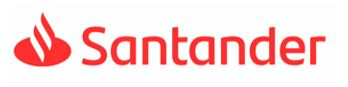

### Reto: People Analytics. Construcción de un modelo para segmentar un conjunto de líderes que defina las características culturales de nuestra organización e identificar el conjunto de características que deben tener los líderes que nos permitan tener un mayor desempeño alineados con la voluntad de ser un una empresa más diversa, inclusiva y heterogénea.

#### Conjunto de datos: El conjunto de datos será un conjunto de personas junto con sus características demográficas, desempeño, formación y carrera en la compañía, con un histórico de su evolución en 3 años. Entre los campos a incluirán estarán. texto en negrita




# 1.   INTRO: Proceso Análisis Exploratorio

Introducción al EDA (Exploratory Data Analysis).
Notebook por: EQUIPO SANTANDER


# 01 Import
Importamos todas las librerías necesarias para este análisis

In [ ]:
#**********************************************************************
# Import packages
#**********************************************************************
import sys
import numpy as np
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


Cargamos el archivo desde nuestra carpeta local


In [ ]:
# Subimos el archivo
from google.colab import files
uploaded = files.upload()

Saving Proyect_SPA_2022.xlsx to Proyect_SPA_2022.xlsx
Saving Proyect_SPA_2021.xlsx to Proyect_SPA_2021.xlsx
Saving Proyect_SPA_2020.xlsx to Proyect_SPA_2020.xlsx


In [ ]:
# haciendo una asignacion, en el dataframe se actua directamente creando la nueva columna , quedando modificado el DF
df_2020 = pd.read_excel ("Proyect_SPA_2020.xlsx")
df_2020.head(5)


ID Gender Country of Origin  Age     Tenure  \
0  AA001   Male            Mexico   55 2019-05-31   
1  AA002   Male         Argentina   42 2022-10-01   
2  AA003   Male            Mexico   56 1996-08-27   
3  AA004   Male            Mexico   53 2014-11-03   
4  AA005   Male             Spain   41 2014-11-03   

                                          Job Family       Position Level 1  \
0  Top Management/Executives\n\nTop Management / ...  Santander Departments   
1                IT - Delivery\n\nProject Management  Santander Departments   
2  Top Management/Executives\n\nTop Management / ...  Santander Departments   
3  Top Management/Executives\n\nTop Management / ...  Santander Departments   
4                        Top Management / Executives  Santander Departments   

   Position Level 2             Position Level 3         Position Level 4  \
0  Santander México    Nodo Raíz Árbol Seguridad  DE Contraloria Norm CCO   
1  Santander México    Nodo Raíz Árbol Seguridad       Chief Data Officer   
2  Santander México    Nodo Raíz Árbol Seguridad     Intervencion General   
3  Santander México  Presidente Ejec Dir Gral GF      DG Juridico Cumplim   
4  Santander México    Nodo Raíz Árbol Seguridad      Estrategia Clientes   

   ... Embrace change - Manager Valoracion 360 Colaboradores  \
0  ...                      2.0                       3.6250   
1  ...                      NaN                          NaN   
2  ...                      4.0                       3.2500   
3  ...                      4.0                       2.9375   
4  ...                      NaN                          NaN   

  Show respect - Colaboradores Truly listen - Colaboradores  \
0                     3.750000                         3.75   
1                          NaN                          NaN   
2                     3.333333                         3.00   
3                     3.000000                         2.25   
4                          NaN                          NaN   

  Talk straight - Colaboradores Keep promises - Colaboradores  \
0                      3.750000                      3.250000   
1                           NaN                           NaN   
2                      3.166667                      3.166667   
3                      3.000000                      2.750000   
4                           NaN                           NaN   

  Actively collaborate - Colaboradores Bring passion - Colaboradores  \
0                             3.500000                          3.75   
1                                  NaN                           NaN   
2                             3.166667                          3.50   
3                             3.250000                          3.25   
4                                  NaN                           NaN   

   Support people - Colaboradores Embrace change - Colaboradores  
0                            3.25                       4.000000  
1                             NaN                            NaN  
2                            3.00                       3.666667  
3                            3.00                       3.000000  
4                             NaN                            NaN  

[5 rows x 84 columns]

In [ ]:
df_2020.describe()

Age   n_children  spain_of_control    pct_women  pct_below40  \
count  2127.000000  1107.000000       2127.000000  2127.000000  2127.000000   
mean     47.074753     2.208672        155.702868     0.400726     0.483092   
std       6.917098     0.898460        844.067230     0.239409     0.290293   
min       0.000000     1.000000          0.000000     0.000000     0.000000   
25%      43.000000     2.000000          5.000000     0.250000     0.264136   
50%      47.000000     2.000000         17.000000     0.425532     0.504065   
75%      51.000000     3.000000         62.000000     0.565217     0.700394   
max      73.000000     9.000000      23737.000000     1.000000     1.000000   

       pct_above60  avg_age_sub  avg_ten_sub  pct_corp_seg     pct_STEM  ...  \
count  2127.000000  2127.000000  2127.000000        2127.0  2127.000000  ...   
mean      0.017430    35.319899    10.711764           0.0     0.108895  ...   
std       0.049304    13.633536     6.318810           0.0     0.273039  ...   
min       0.000000     0.000000     0.000000           0.0     0.000000  ...   
25%       0.000000    34.748134     6.744565           0.0     0.000000  ...   
50%       0.000000    38.911894    10.617920           0.0     0.000000  ...   
75%       0.011731    42.544856    14.343534           0.0     0.013174  ...   
max       0.826866    76.432836    32.354167           0.0     1.000000  ...   

       Embrace change - Manager  Valoracion 360 Colaboradores  \
count                826.000000                    722.000000   
mean                   2.952179                      3.263710   
std                    0.710835                      0.333820   
min                    1.000000                      2.000000   
25%                    2.000000                      3.072321   
50%                    3.000000                      3.282670   
75%                    3.000000                      3.500000   
max                    4.000000                      4.000000   

       Show respect - Colaboradores  Truly listen - Colaboradores  \
count                    722.000000                    722.000000   
mean                       3.265499                      3.037060   
std                        0.475895                      0.469746   
min                        1.600000                      1.333333   
25%                        3.000000                      2.750000   
50%                        3.333333                      3.000000   
75%                        3.666667                      3.333333   
max                        4.000000                      4.000000   

       Talk straight - Colaboradores  Keep promises - Colaboradores  \
count                     722.000000                     722.000000   
mean                        3.254864                       3.187610   
std                         0.451144                       0.426528   
min                         1.333333                       1.666667   
25%                         3.000000                       3.000000   
50%                         3.333333                       3.235294   
75%                         3.600000                       3.500000   
max                         4.000000                       4.000000   

       Actively collaborate - Colaboradores  Bring passion - Colaboradores  \
count                            722.000000                     722.000000   
mean                               3.294918                       3.516173   
std                                0.412761                       0.408615   
min                                1.333333                       1.833333   
25%                                3.000000                       3.317708   
50%                                3.333333                       3.600000   
75%                                3.600000                       3.800000   
max                                4.000000                       4.000000   

       Support people - Colabor

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 84 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2127 non-null   object        
 1   Gender                                 2117 non-null   object        
 2   Country of Origin                      1623 non-null   object        
 3   Age                                    2127 non-null   int64         
 4   Tenure                                 2127 non-null   datetime64[ns]
 5   Job Family                             2117 non-null   object        
 6   Position Level 1                       2118 non-null   object        
 7   Position Level 2                       2118 non-null   object        
 8   Position Level 3                       2117 non-null   object        
 9   Position Level 4                       2081 non-null   object  

In [ ]:
df_2021 = pd.read_excel ("Proyect_SPA_2021.xlsx")
df_2021.head(5)

ID Gender Country of Origin  Age     Tenure            Job Family  \
0  AA001   Male            Mexico   56 2019-05-31  Top Management (NEW)   
1  AA002   Male         Argentina   43 2022-10-01  Top Management (NEW)   
2  AA003   Male            Mexico   57 1996-08-27  Top Management (NEW)   
3  AA004   Male            Mexico   54 2014-11-03  Top Management (NEW)   
4  AA005   Male             Spain   42 2014-11-03  Top Management (NEW)   

        Position Level 1  Position Level 2             Position Level 3  \
0  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
1  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
2  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
3  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
4  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   

               Position Level 4  ... Embrace change - Manager  \
0                    DG Riesgos  ...                      2.0   
1  DE Deputy Head Of Technology  ...                      3.0   
2              DG Interv y Ctrl  ...                      4.0   
3           DG Juridico Cumplim  ...                      3.0   
4        DG Estrategia Negocios  ...                      NaN   

  Valoracion 360 Colaboradores Show respect - Colaboradores  \
0                        3.625                     3.833333   
1                        3.250                     3.400000   
2                        3.350                     3.400000   
3                        3.325                     3.400000   
4                        3.250                     3.222222   

  Truly listen - Colaboradores Talk straight - Colaboradores  \
0                     3.333333                      3.500000   
1                     3.000000                      3.400000   
2                     2.800000                      3.200000   
3                     2.800000                      3.200000   
4                     3.222222                      3.111111   

  Keep promises - Colaboradores Actively collaborate - Colaboradores  \
0                      3.666667                             3.500000   
1                      3.200000                             3.000000   
2                      3.200000                             3.800000   
3                      3.200000                             3.400000   
4                      3.111111                             3.111111   

  Bring passion - Colaboradores  Support people - Colaboradores  \
0                      3.666667                        3.666667   
1                      3.800000                        3.200000   
2                      3.400000                        3.400000   
3                      3.400000                        3.800000   
4                      3.555556                        3.333333   

  Embrace change - Colaboradores  
0                       3.833333  
1                       3.000000  
2                       3.600000  
3                       3.400000  
4                       3.333333  

[5 rows x 84 columns]

In [ ]:
df_2021.describe()

Age   n_children  spain_of_control    pct_women  pct_below40  \
count  2229.000000  1136.000000       2229.000000  2229.000000  2229.000000   
mean     48.014805     2.204225        176.213549     0.409690     0.472327   
std       6.915446     0.899642        870.491679     0.238546     0.285864   
min       0.000000     1.000000          0.000000     0.000000     0.000000   
25%      44.000000     2.000000          6.000000     0.267724     0.250000   
50%      48.000000     2.000000         18.000000     0.436364     0.500000   
75%      52.000000     3.000000         69.000000     0.571429     0.687500   
max      74.000000     9.000000      23712.000000     1.000000     1.000000   

       pct_above60  avg_age_sub  avg_ten_sub  pct_corp_seg     pct_STEM  ...  \
count  2229.000000  2229.000000  2229.000000   2229.000000  2229.000000  ...   
mean      0.018364    35.570672     9.739058      0.015272     0.104349  ...   
std       0.049869    13.537222     6.095147      0.056714     0.259109  ...   
min       0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%       0.000000    35.000000     5.545455      0.000000     0.000000  ...   
50%       0.000000    39.137931     9.500000      0.000000     0.000000  ...   
75%       0.012605    42.974359    13.486998      0.000000     0.016393  ...   
max       0.750000    63.750000    31.066667      1.000000     1.000000  ...   

       Embrace change - Manager  Valoracion 360 Colaboradores  \
count               1514.000000                   1078.000000   
mean                   2.959930                      3.283633   
std                    0.678385                      0.338492   
min                    1.000000                      1.687500   
25%                    2.500000                      3.078125   
50%                    3.000000                      3.325000   
75%                    3.000000                      3.520833   
max                    4.000000                      4.000000   

       Show respect - Colaboradores  Truly listen - Colaboradores  \
count                   1076.000000                   1076.000000   
mean                       3.323461                      3.050184   
std                        0.480504                      0.478079   
min                        1.250000                      1.000000   
25%                        3.000000                      2.750000   
50%                        3.394444                      3.000000   
75%                        3.666667                      3.400000   
max                        4.000000                      4.000000   

       Talk straight - Colaboradores  Keep promises - Colaboradores  \
count                    1076.000000                    1076.000000   
mean                        3.276107                       3.228660   
std                         0.443349                       0.437334   
min                         1.250000                       1.500000   
25%                         3.000000                       3.000000   
50%                         3.333333                       3.250000   
75%                         3.600000                       3.500000   
max                         4.000000                       4.000000   

       Actively collaborate - Colaboradores  Bring passion - Colaboradores  \
count                           1076.000000                    1076.000000   
mean                               3.308645                       3.532327   
std                                0.402567                       0.384925   
min                                1.666667                       1.833333   
25%                                3.000000                       3.333333   
50%                                3.333333                       3.600000   
75%                                3.600000                       3.833333   
max                                4.000000                       4.000000   

       Support people - Colabor

In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 84 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     2229 non-null   object        
 1   Gender                                 2219 non-null   object        
 2   Country of Origin                      1677 non-null   object        
 3   Age                                    2229 non-null   int64         
 4   Tenure                                 2229 non-null   datetime64[ns]
 5   Job Family                             2220 non-null   object        
 6   Position Level 1                       2220 non-null   object        
 7   Position Level 2                       2220 non-null   object        
 8   Position Level 3                       2216 non-null   object        
 9   Position Level 4                       2114 non-null   object  

In [ ]:
df_2022 = pd.read_excel ("Proyect_SPA_2022.xlsx")
df_2022.head(5)

ID Gender Country of Origin  Age     Tenure  \
0  AA001   Male            Mexico   57 2019-05-31   
1  AA002   Male         Argentina   44 2022-10-01   
2  AA003   Male            Mexico   58 1996-08-27   
3  AA004   Male            Mexico   55 2014-11-03   
4  AA005   Male             Spain   42 2014-11-03   

                     Job Family       Position Level 1       Position Level 2  \
0                    Compliance  Santander Departments       Santander México   
1  Data Management & Governance  Santander Departments  Global & Corporate HQ   
2                    Accounting  Santander Departments       Santander México   
3                Top Management  Santander Departments       Santander México   
4       Data Analytics & Models  Santander Departments       Santander México   

                                Position Level 3  \
0                    Presidente Ejec Dir Gral GF   
1  SANCO_NGT NEGOCIOS GLOBALES / “TRANSVERSALES”   
2                    Presidente Ejec Dir Gral GF   
3                    Presidente Ejec Dir Gral GF   
4                    Presidente Ejec Dir Gral GF   

                           Position Level 4  ...  \
0                                DG Riesgos  ...   
1  SANCO_9266 DIV WEALTH MANAG. & INSURANCE  ...   
2                          DG Interv y Ctrl  ...   
3                       DG Juridico Cumplim  ...   
4                    DG Estrategia Negocios  ...   

  Embrace Change – Impulso el cambio - Manager  \
0                                          3.0   
1                                          3.0   
2                                          4.0   
3                                          2.0   
4                                          2.5   

  Act Now – Actúo con rapidez - Manager  \
0                                   2.0   
1                                   2.0   
2                                   4.0   
3                                   3.0   
4                                   2.5   

  Move Together – Trabajo en equipo - Manager  \
0                                         2.0   
1                                         3.5   
2                                         3.0   
3                                         3.0   
4                                         2.5   

  Speak Up – Hablo abiertamente - Manager Valoracion 360 Colaboradores  \
0                                     2.5                     3.466667   
1                                     3.5                     2.933333   
2                                     4.0                     3.142857   
3                                     3.0                     3.800000   
4                                     3.0                     3.228571   

  Think Customer – Pienso en el cliente - Colaboradores  \
0                                           3.666667      
1                                           2.333333      
2                                           3.000000      
3                                           4.000000      
4                                           3.571429      

  Embrace Change – Impulso el cambio - Colaboradores  \
0                                           3.666667   
1                                           2.666667   
2                                           3.285714   
3                                           3.400000   
4                                           3.428571   

  Act Now – Actúo con rapidez - Colaboradores  \
0                                    3.000000   
1                                    3.333333   
2                                    3.285714   
3                                    3.600000   
4                                    2.857143   

   Move Together – Trabajo en equipo - Colaboradores  \
0                                           3.333333   
1                                           3.333333   
2                                           3.142857   
3                                           4.000000   
4      

In [ ]:
df_2022.describe()

Age   n_children  spain_of_control    pct_women  pct_below40  \
count  2260.000000  1146.000000       2260.000000  2260.000000  2260.000000   
mean     48.815929     2.204188        228.004425     0.427207     0.478503   
std       6.940761     0.898431       1297.642632     0.234160     0.275159   
min       0.000000     1.000000          0.000000     0.000000     0.000000   
25%      45.000000     2.000000          6.000000     0.285714     0.284637   
50%      49.000000     2.000000         21.000000     0.448276     0.500000   
75%      53.000000     3.000000         80.000000     0.579820     0.681980   
max      74.000000     9.000000      28838.000000     1.000000     1.000000   

       pct_above60  avg_age_sub  avg_ten_sub  pct_corp_seg     pct_STEM  ...  \
count  2260.000000  2260.000000  2260.000000   2260.000000  2260.000000  ...   
mean      0.019298    36.490072     9.040662      0.014683     0.103786  ...   
std       0.046636    12.437085     5.896654      0.052652     0.255015  ...   
min       0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%       0.000000    35.305769     4.843571      0.000000     0.000000  ...   
50%       0.000000    39.231111     8.508621      0.000000     0.000000  ...   
75%       0.016949    43.166667    12.474828      0.000000     0.026184  ...   
max       0.500000    56.666667    30.325581      1.000000     1.000000  ...   

       Embrace Change – Impulso el cambio - Manager  \
count                                   2050.000000   
mean                                       2.914146   
std                                        0.704803   
min                                        1.000000   
25%                                        2.000000   
50%                                        3.000000   
75%                                        3.000000   
max                                        4.000000   

       Act Now – Actúo con rapidez - Manager  \
count                            2050.000000   
mean                                3.013089   
std                                 0.689974   
min                                 1.000000   
25%                                 3.000000   
50%                                 3.000000   
75%                                 3.500000   
max                                 4.000000   

       Move Together – Trabajo en equipo - Manager  \
count                                  2050.000000   
mean                                      3.097073   
std                                       0.679143   
min                                       1.000000   
25%                                       3.000000   
50%                                       3.000000   
75%                                       4.000000   
max                                       4.000000   

       Speak Up – Hablo abiertamente - Manager  Valoracion 360 Colaboradores  \
count                              2050.000000                   1551.000000   
mean                                  3.045447                      3.364673   
std                                   0.664105                      0.334008   
min                                   1.000000                      1.880000   
25%                                   3.000000                      3.151923   
50%                                   3.000000                      3.400000   
75%                                   3.500000                      3.600000   
max                                   4.000000                      4.000000   

       Think Customer – Pienso en el cliente - Colaboradores  \
count                                        1551.000000       
mean                                            3.427577       
std                                             0.387292       
min                                             2.000000       
25%                                             3.200000       
50%                                             3.500000     

In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 72 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   ID                                                      2260 non-null   object        
 1   Gender                                                  2250 non-null   object        
 2   Country of Origin                                       1701 non-null   object        
 3   Age                                                     2260 non-null   int64         
 4   Tenure                                                  2260 non-null   datetime64[ns]
 5   Job Family                                              2251 non-null   object        
 6   Position Level 1                                        2251 non-null   object        
 7   Position Level 2                                        2251

## Juntar Dataframes
Tenemos tres dataframes.

Los de los años 2020 y 2021 comparten completamente los encabezados de las columnas. Por ello, juntaremos ambos en un dataframe intermedio mediante la función "concat".



In [ ]:
df_intermed = pd.concat([df_2020, df_2021])

In [ ]:
df_intermed.head()

ID Gender Country of Origin  Age     Tenure  \
0  AA001   Male            Mexico   55 2019-05-31   
1  AA002   Male         Argentina   42 2022-10-01   
2  AA003   Male            Mexico   56 1996-08-27   
3  AA004   Male            Mexico   53 2014-11-03   
4  AA005   Male             Spain   41 2014-11-03   

                                          Job Family       Position Level 1  \
0  Top Management/Executives\n\nTop Management / ...  Santander Departments   
1                IT - Delivery\n\nProject Management  Santander Departments   
2  Top Management/Executives\n\nTop Management / ...  Santander Departments   
3  Top Management/Executives\n\nTop Management / ...  Santander Departments   
4                        Top Management / Executives  Santander Departments   

   Position Level 2             Position Level 3         Position Level 4  \
0  Santander México    Nodo Raíz Árbol Seguridad  DE Contraloria Norm CCO   
1  Santander México    Nodo Raíz Árbol Seguridad       Chief Data Officer   
2  Santander México    Nodo Raíz Árbol Seguridad     Intervencion General   
3  Santander México  Presidente Ejec Dir Gral GF      DG Juridico Cumplim   
4  Santander México    Nodo Raíz Árbol Seguridad      Estrategia Clientes   

   ... Embrace change - Manager Valoracion 360 Colaboradores  \
0  ...                      2.0                       3.6250   
1  ...                      NaN                          NaN   
2  ...                      4.0                       3.2500   
3  ...                      4.0                       2.9375   
4  ...                      NaN                          NaN   

  Show respect - Colaboradores Truly listen - Colaboradores  \
0                     3.750000                         3.75   
1                          NaN                          NaN   
2                     3.333333                         3.00   
3                     3.000000                         2.25   
4                          NaN                          NaN   

  Talk straight - Colaboradores Keep promises - Colaboradores  \
0                      3.750000                      3.250000   
1                           NaN                           NaN   
2                      3.166667                      3.166667   
3                      3.000000                      2.750000   
4                           NaN                           NaN   

  Actively collaborate - Colaboradores Bring passion - Colaboradores  \
0                             3.500000                          3.75   
1                                  NaN                           NaN   
2                             3.166667                          3.50   
3                             3.250000                          3.25   
4                                  NaN                           NaN   

   Support people - Colaboradores Embrace change - Colaboradores  
0                            3.25                       4.000000  
1                             NaN                            NaN  
2                            3.00                       3.666667  
3                            3.00                       3.000000  
4                             NaN                            NaN  

[5 rows x 84 columns]

In [ ]:
df_intermed.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 0 to 2228
Data columns (total 84 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID                                     4356 non-null   object        
 1   Gender                                 4336 non-null   object        
 2   Country of Origin                      3300 non-null   object        
 3   Age                                    4356 non-null   int64         
 4   Tenure                                 4356 non-null   datetime64[ns]
 5   Job Family                             4337 non-null   object        
 6   Position Level 1                       4338 non-null   object        
 7   Position Level 2                       4338 non-null   object        
 8   Position Level 3                       4333 non-null   object        
 9   Position Level 4                       4195 non-null   object  

Vamos a hacer data enginering para transformar los datos de evaluación de 2020 y 2021 a los mismos conceptos que 2022

Vamos a crear una columna nueva en el dataset, darle el nombre que queremos y que esa columna sea la media de las otras dos.
En otros casos solo hay que cambiar el nombre de las columnas

In [ ]:
df_20_21=df_intermed.rename( columns={'Support people - Global':'Think Customer – Pienso en el cliente - Global', 'Support people - Autovaloracion': 'Think Customer – Pienso en el cliente - Autovaloracion', 'Support people - Manager': 'Think Customer – Pienso en el cliente - Manager', 'Support people - Colaboradores': 'Think Customer – Pienso en el cliente - Colaboradores',
                                      'Embrace change - Global': 'Embrace Change – Impulso el cambio - Global', 'Embrace change - Autovaloracion': 'Embrace Change – Impulso el cambio - Autovaloracion', 'Embrace change - Manager': 'Embrace Change – Impulso el cambio - Manager', 'Embrace change - Colaboradores': 'Embrace Change – Impulso el cambio - Colaboradores'})

df_20_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 0 to 2228
Data columns (total 84 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   ID                                                      4356 non-null   object        
 1   Gender                                                  4336 non-null   object        
 2   Country of Origin                                       3300 non-null   object        
 3   Age                                                     4356 non-null   int64         
 4   Tenure                                                  4356 non-null   datetime64[ns]
 5   Job Family                                              4337 non-null   object        
 6   Position Level 1                                        4338 non-null   object        
 7   Position Level 2                                        4338

In [ ]:
df_20_21

ID Gender         Country of Origin  Age     Tenure  \
0     AA001   Male                    Mexico   55 2019-05-31   
1     AA002   Male                 Argentina   42 2022-10-01   
2     AA003   Male                    Mexico   56 1996-08-27   
3     AA004   Male                    Mexico   53 2014-11-03   
4     AA005   Male                     Spain   41 2014-11-03   
...     ...    ...                       ...  ...        ...   
2224  CC229   Male                       NaN   39 2021-09-07   
2225  CC230   Male                       NaN   50 2021-01-04   
2226  CC231   Male  United States of America   49 1998-09-08   
2227  CC232   Male  United States of America   51 1996-03-25   
2228  CC233   Male                       NaN   52 2021-11-01   

                                             Job Family  \
0     Top Management/Executives\n\nTop Management / ...   
1                   IT - Delivery\n\nProject Management   
2     Top Management/Executives\n\nTop Management / ...   
3     Top Management/Executives\n\nTop Management / ...   
4                           Top Management / Executives   
...                                                 ...   
2224                               Top Management (NEW)   
2225                               Top Management (NEW)   
2226                            Customer S&S: F2F (NEW)   
2227                               Top Management (NEW)   
2228                               Top Management (NEW)   

           Position Level 1  Position Level 2             Position Level 3  \
0     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
1     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
2     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
3     Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
4     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
...                     ...               ...                          ...   
2224  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2225  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2226  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2227  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2228  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   

                                  Position Level 4  ...  \
0                          DE Contraloria Norm CCO  ...   
1                               Chief Data Officer  ...   
2                             Intervencion General  ...   
3                              DG Juridico Cumplim  ...   
4                              Estrategia Clientes  ...   
...                                            ...  ...   
2224                               SOVOR_0010 SBNA  ...   
2225                               SOVOR_0010 SBNA  ...   
2226  SOVBK_NYB0001 Banco Santander S.A. NY Branch  ...   
2227                               SOVOR_0010 SBNA  ...   
2228                               SOVOR_0010 SBNA  ...   

     Embrace Change – Impulso el cambio - Manager  \
0                                             2.0   
1                                             NaN   
2                                             4.0   
3                                             4.0   
4                                             NaN   
...                                           ...   
2224                                          NaN   
2225                                          2.0   
2226                                          NaN   
2227                                          NaN   
2228                                          NaN   

     Valoracion 360 Colaboradores Show respect - Colaboradores  \
0                        3.625000                     3.750000   
1                             NaN                          NaN   
2                        3.250000                 

Creamos las nuevas columnas unificando criterios al 2022.
Eliminamos las columnas antiguas de las que hemos calculado la media
Ordenamos las columnas


In [ ]:
df_20_21['Act Now – Actúo con rapidez - Global']= df_20_21[["Keep promises - Global", "Bring passion - Global"]].mean(axis=1)
df_20_21['Move Together – Trabajo en equipo - Global']= df_20_21[["Actively collaborate - Global", "Show respect - Global"]].mean(axis=1)
df_20_21['Speak Up – Hablo abiertamente - Global']= df_20_21[["Truly listen - Global", "Talk straight - Global"]].mean(axis=1)
df_20_21['Act Now – Actúo con rapidez - Autovaloracion']= df_20_21[["Keep promises - Autovaloracion", "Bring passion - Autovaloracion"]].mean(axis=1)
df_20_21['Move Together – Trabajo en equipo - Autovaloracion']= df_20_21[["Actively collaborate - Autovaloracion", "Show respect - Autovaloracion"]].mean(axis=1)
df_20_21['Speak Up – Hablo abiertamente - Autovaloracion']= df_20_21[["Truly listen - Autovaloracion", "Talk straight - Autovaloracion"]].mean(axis=1)
df_20_21['Act Now – Actúo con rapidez - Manager']= df_20_21[["Keep promises - Manager", "Bring passion - Manager"]].mean(axis=1)
df_20_21['Move Together – Trabajo en equipo - Manager']= df_20_21[["Actively collaborate - Manager", "Show respect - Manager"]].mean(axis=1)
df_20_21['Speak Up – Hablo abiertamente - Manager']= df_20_21[["Truly listen - Manager", "Talk straight - Manager"]].mean(axis=1)
df_20_21['Act Now – Actúo con rapidez - Colaboradores']= df_20_21[["Keep promises - Colaboradores", "Bring passion - Colaboradores"]].mean(axis=1)
df_20_21['Move Together – Trabajo en equipo - Colaboradores']= df_20_21[["Actively collaborate - Colaboradores", "Show respect - Colaboradores"]].mean(axis=1)
df_20_21['Speak Up – Hablo abiertamente - Colaboradores']= df_20_21[["Truly listen - Colaboradores", "Talk straight - Colaboradores"]].mean(axis=1)

In [ ]:
df_20_21

ID Gender         Country of Origin  Age     Tenure  \
0     AA001   Male                    Mexico   55 2019-05-31   
1     AA002   Male                 Argentina   42 2022-10-01   
2     AA003   Male                    Mexico   56 1996-08-27   
3     AA004   Male                    Mexico   53 2014-11-03   
4     AA005   Male                     Spain   41 2014-11-03   
...     ...    ...                       ...  ...        ...   
2224  CC229   Male                       NaN   39 2021-09-07   
2225  CC230   Male                       NaN   50 2021-01-04   
2226  CC231   Male  United States of America   49 1998-09-08   
2227  CC232   Male  United States of America   51 1996-03-25   
2228  CC233   Male                       NaN   52 2021-11-01   

                                             Job Family  \
0     Top Management/Executives\n\nTop Management / ...   
1                   IT - Delivery\n\nProject Management   
2     Top Management/Executives\n\nTop Management / ...   
3     Top Management/Executives\n\nTop Management / ...   
4                           Top Management / Executives   
...                                                 ...   
2224                               Top Management (NEW)   
2225                               Top Management (NEW)   
2226                            Customer S&S: F2F (NEW)   
2227                               Top Management (NEW)   
2228                               Top Management (NEW)   

           Position Level 1  Position Level 2             Position Level 3  \
0     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
1     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
2     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
3     Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
4     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
...                     ...               ...                          ...   
2224  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2225  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2226  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2227  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   
2228  Santander Departments     Santander USA   SOVOR_0000 Grupo Santander   

                                  Position Level 4  ...  \
0                          DE Contraloria Norm CCO  ...   
1                               Chief Data Officer  ...   
2                             Intervencion General  ...   
3                              DG Juridico Cumplim  ...   
4                              Estrategia Clientes  ...   
...                                            ...  ...   
2224                               SOVOR_0010 SBNA  ...   
2225                               SOVOR_0010 SBNA  ...   
2226  SOVBK_NYB0001 Banco Santander S.A. NY Branch  ...   
2227                               SOVOR_0010 SBNA  ...   
2228                               SOVOR_0010 SBNA  ...   

     Speak Up – Hablo abiertamente - Global  \
0                                  3.166667   
1                                       NaN   
2                                  3.071429   
3                                  2.555556   
4                                  3.111111   
...                                     ...   
2224                                    NaN   
2225                               2.909091   
2226                                    NaN   
2227                                    NaN   
2228                                    NaN   

     Act Now – Actúo con rapidez - Autovaloracion  \
0                                             3.0   
1                                             NaN   
2                                             4.0   
3                                             3.0   
4                                             4.0   
..

In [ ]:
df_20_21.columns

Index(['ID', 'Gender', 'Country of Origin', 'Age', 'Tenure', 'Job Family',
       'Position Level 1', 'Position Level 2', 'Position Level 3',
       'Position Level 4', 'Position Level 5', 'Position Level 6',
       'Position Level 7', 'Position Level 8', 'Management Level',
       'Corporate Segment', 'Negocio/ No Negocio', 'mar_status', 'n_children',
       'field_study', 'spain_of_control', 'pct_women', 'pct_below40',
       'pct_above60', 'avg_age_sub', 'avg_ten_sub', 'pct_corp_seg', 'pct_STEM',
       'pct_mngt_lvl', 'what_performance_rating_h', 'what_performance_label_h',
       'what_performance_rating_f', 'what_performance_label_f',
       'how_performance_rating', 'how_performance_label',
       'risk_performance_rating', 'risk_performance_label',
       'overall_manager_rating', 'overall_manager_label',
       'emp_what_perf_rating', 'emp_what_perf_label', 'emp_how_perf_rating',
       'emp_how_perf_label', 'emp_rsk_perf_rating', 'emp_rsk_perf_label',
       'overall_employee

In [ ]:
df_20_21=df_20_21.drop(columns=['Show respect - Global',
       'Truly listen - Global', 'Talk straight - Global',
       'Keep promises - Global', 'Actively collaborate - Global',
       'Bring passion - Global',
       'Show respect - Autovaloracion',
       'Truly listen - Autovaloracion', 'Talk straight - Autovaloracion',
       'Keep promises - Autovaloracion',
       'Actively collaborate - Autovaloracion',
       'Bring passion - Autovaloracion',
        'Show respect - Manager',
       'Truly listen - Manager', 'Talk straight - Manager',
       'Keep promises - Manager', 'Actively collaborate - Manager',
       'Bring passion - Manager',
        'Show respect - Colaboradores',
       'Truly listen - Colaboradores', 'Talk straight - Colaboradores',
       'Keep promises - Colaboradores', 'Actively collaborate - Colaboradores',
       'Bring passion - Colaboradores'
       ])

In [ ]:
df_20_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 0 to 2228
Data columns (total 72 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   ID                                                      4356 non-null   object        
 1   Gender                                                  4336 non-null   object        
 2   Country of Origin                                       3300 non-null   object        
 3   Age                                                     4356 non-null   int64         
 4   Tenure                                                  4356 non-null   datetime64[ns]
 5   Job Family                                              4337 non-null   object        
 6   Position Level 1                                        4338 non-null   object        
 7   Position Level 2                                        4338

In [ ]:
df_2022.columns

Index(['ID', 'Gender', 'Country of Origin', 'Age', 'Tenure', 'Job Family',
       'Position Level 1', 'Position Level 2', 'Position Level 3',
       'Position Level 4', 'Position Level 5', 'Position Level 6',
       'Position Level 7', 'Position Level 8', 'Management Level',
       'Corporate Segment', 'Negocio/ No Negocio', 'mar_status', 'n_children',
       'field_study', 'spain_of_control', 'pct_women', 'pct_below40',
       'pct_above60', 'avg_age_sub', 'avg_ten_sub', 'pct_corp_seg', 'pct_STEM',
       'pct_mngt_lvl', 'what_performance_rating_h', 'what_performance_label_h',
       'what_performance_rating_f', 'what_performance_label_f',
       'how_performance_rating', 'how_performance_label',
       'risk_performance_rating', 'risk_performance_label',
       'overall_manager_rating', 'overall_manager_label',
       'emp_what_perf_rating', 'emp_what_perf_label', 'emp_how_perf_rating',
       'emp_how_perf_label', 'emp_rsk_perf_rating', 'emp_rsk_perf_label',
       'overall_employee

In [ ]:
df_2022.describe

<bound method NDFrame.describe of          ID  Gender Country of Origin  Age     Tenure  \
0     AA001    Male            Mexico   57 2019-05-31   
1     AA002    Male         Argentina   44 2022-10-01   
2     AA003    Male            Mexico   58 1996-08-27   
3     AA004    Male            Mexico   55 2014-11-03   
4     AA005    Male             Spain   42 2014-11-03   
...     ...     ...               ...  ...        ...   
2255  CC276  Female               NaN   47 2022-08-01   
2256  CC277    Male               NaN   41 2022-08-15   
2257  CC278    Male               NaN   51 2022-09-12   
2258  CC279    Male         Argentina   51 2022-08-22   
2259  CC280    Male               NaN   56 2022-08-29   

                        Job Family       Position Level 1  \
0                       Compliance  Santander Departments   
1     Data Management & Governance  Santander Departments   
2                       Accounting  Santander Departments   
3                   Top Management  S

In [ ]:
orden_columnas=['ID', 'Gender', 'Country of Origin', 'Age', 'Tenure', 'Job Family',
       'Position Level 1', 'Position Level 2', 'Position Level 3',
       'Position Level 4', 'Position Level 5', 'Position Level 6',
       'Position Level 7', 'Position Level 8', 'Management Level',
       'Corporate Segment', 'Negocio/ No Negocio', 'mar_status', 'n_children',
       'field_study', 'spain_of_control', 'pct_women', 'pct_below40',
       'pct_above60', 'avg_age_sub', 'avg_ten_sub', 'pct_corp_seg', 'pct_STEM',
       'pct_mngt_lvl', 'what_performance_rating_h', 'what_performance_label_h',
       'what_performance_rating_f', 'what_performance_label_f',
       'how_performance_rating', 'how_performance_label',
       'risk_performance_rating', 'risk_performance_label',
       'overall_manager_rating', 'overall_manager_label',
       'emp_what_perf_rating', 'emp_what_perf_label', 'emp_how_perf_rating',
       'emp_how_perf_label', 'emp_rsk_perf_rating', 'emp_rsk_perf_label',
       'overall_employee_rating', 'overall_employee_label', 'year_performance',
       'Valoracion 360 Global',
       'Think Customer – Pienso en el cliente - Global',
       'Embrace Change – Impulso el cambio - Global',
       'Act Now – Actúo con rapidez - Global',
       'Move Together – Trabajo en equipo - Global',
       'Speak Up – Hablo abiertamente - Global',
       'Valoracion 360 Autovaloracion',
       'Think Customer – Pienso en el cliente - Autovaloracion',
       'Embrace Change – Impulso el cambio - Autovaloracion',
       'Act Now – Actúo con rapidez - Autovaloracion',
       'Move Together – Trabajo en equipo - Autovaloracion',
       'Speak Up – Hablo abiertamente - Autovaloracion',
       'Valoracion 360 Manager',
       'Think Customer – Pienso en el cliente - Manager',
       'Embrace Change – Impulso el cambio - Manager',
       'Act Now – Actúo con rapidez - Manager',
       'Move Together – Trabajo en equipo - Manager',
       'Speak Up – Hablo abiertamente - Manager',
       'Valoracion 360 Colaboradores',
       'Think Customer – Pienso en el cliente - Colaboradores',
       'Embrace Change – Impulso el cambio - Colaboradores',
       'Act Now – Actúo con rapidez - Colaboradores',
       'Move Together – Trabajo en equipo - Colaboradores',
       'Speak Up – Hablo abiertamente - Colaboradores']

# Nueva sección

In [ ]:
df_20_21=df_20_21[orden_columnas]

In [ ]:
df_20_21.head(150)

ID  Gender Country of Origin  Age     Tenure  \
0    AA001    Male            Mexico   55 2019-05-31   
1    AA002    Male         Argentina   42 2022-10-01   
2    AA003    Male            Mexico   56 1996-08-27   
3    AA004    Male            Mexico   53 2014-11-03   
4    AA005    Male             Spain   41 2014-11-03   
..     ...     ...               ...  ...        ...   
145  AA146    Male             Spain   49 2013-07-15   
146  AA147    Male             Spain   45 2018-01-15   
147  AA148    Male    United Kingdom   42 2022-09-01   
148  AA149  Female             Spain   45 2018-02-12   
149  AA150  Female             Spain   32 2018-02-12   

                                            Job Family       Position Level 1  \
0    Top Management/Executives\n\nTop Management / ...  Santander Departments   
1                  IT - Delivery\n\nProject Management  Santander Departments   
2    Top Management/Executives\n\nTop Management / ...  Santander Departments   
3    Top Management/Executives\n\nTop Management / ...  Santander Departments   
4                          Top Management / Executives  Santander Departments   
..                                                 ...                    ...   
145         Internal Control (2nd and 3rd LoD)\n\nRisk  Santander Departments   
146  Retail Banking - Customer Facing\n\nRetail Pro...  Santander Departments   
147                   Cybersecurity\n\nIT - Enterprise  Santander Departments   
148  Top Management/Executives\n\nTop Management / ...  Santander Departments   
149          Staff\n\nStrategy & Corporate Development  Santander Departments   

          Position Level 2                               Position Level 3  \
0         Santander México                      Nodo Raíz Árbol Seguridad   
1         Santander México                      Nodo Raíz Árbol Seguridad   
2         Santander México                      Nodo Raíz Árbol Seguridad   
3         Santander México                    Presidente Ejec Dir Gral GF   
4         Santander México                      Nodo Raíz Árbol Seguridad   
..                     ...                                            ...   
145  Global & Corporate HQ            SANCO_UC UNIDADES CORPORATIVAS/CSGs   
146  Global & Corporate HQ  SANCO_NGT NEGOCIOS GLOBALES / “TRANSVERSALES”   
147  Global & Corporate HQ            SANCO_UC UNIDADES CORPORATIVAS/CSGs   
148  Global & Corporate HQ            SANCO_UC UNIDADES CORPORATIVAS/CSGs   
149  Global & Corporate HQ            SANCO_UC UNIDADES CORPORATIVAS/CSGs   

                            Position Level 4  ...  \
0                    DE Contraloria Norm CCO  ...   
1                         Chief Data Officer  ...   
2                       Intervencion General  ...   
3                        DG Juridico Cumplim  ...   
4                        Estrategia Clientes  ...   
..                                       ...  ...   
145                   SANCO_8525 DIV RIESGOS  ...   
146   SANCO_9173 REESTUC Y PARTICIP CORPORAT  ...   
147  SANCO_8491 DIV TECNOLOGIA Y OPERACIONES  ...   
148                   SANCO_8588 PRESIDENCIA  ...   
149                   SANCO_8588 PRESIDENCIA  ...   

    Embrace Change – Impulso el cambio - Manager  \
0                                            2.0   
1                                            NaN   
2                                            4.0   
3                                            4.0   
4                                            NaN   
..                                           ...   
145                                          4.0   
146                                          NaN   
147                                          NaN   
148                                          NaN   
149                                          NaN   

    Act Now – Actúo con rapidez - Manager  \
0                                     2.0   
1                                     NaN   
2                                     3.

In [ ]:
df_completo = pd.concat([df_20_21, df_2022])

In [ ]:
# Reiniciar el índice con una nueva secuencia numérica
df_completo.reset_index(drop=True, inplace=True)

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6616 entries, 0 to 6615
Data columns (total 72 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   ID                                                      6616 non-null   object        
 1   Gender                                                  6586 non-null   object        
 2   Country of Origin                                       5001 non-null   object        
 3   Age                                                     6616 non-null   int64         
 4   Tenure                                                  6616 non-null   datetime64[ns]
 5   Job Family                                              6588 non-null   object        
 6   Position Level 1                                        6589 non-null   object        
 7   Position Level 2                                        6589

In [ ]:
df_completo.shape

(6616, 72)

In [ ]:
df_completo.describe()

Age   n_children  spain_of_control    pct_women  pct_below40  \
count  6616.000000  3389.000000       6616.000000  6616.000000  6616.000000   
mean     47.986245     2.205665        187.311064     0.412792     0.477897   
std       6.959789     0.898584       1029.641290     0.237555     0.283693   
min       0.000000     1.000000          0.000000     0.000000     0.000000   
25%      44.000000     2.000000          6.000000     0.272727     0.266667   
50%      48.000000     2.000000         18.000000     0.436608     0.500000   
75%      52.000000     3.000000         70.000000     0.571429     0.689306   
max      74.000000     9.000000      28838.000000     1.000000     1.000000   

       pct_above60  avg_age_sub  avg_ten_sub  pct_corp_seg     pct_STEM  ...  \
count  6616.000000  6616.000000  6616.000000   6616.000000  6616.000000  ...   
mean      0.018383    35.804114     9.813207      0.010161     0.105618  ...   
std       0.048602    13.211290     6.138766      0.045597     0.262271  ...   
min       0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%       0.000000    35.000000     5.625000      0.000000     0.000000  ...   
50%       0.000000    39.100000     9.541958      0.000000     0.000000  ...   
75%       0.014286    42.915966    13.501316      0.000000     0.018412  ...   
max       0.826866    76.432836    32.354167      1.000000     1.000000  ...   

       Embrace Change – Impulso el cambio - Manager  \
count                                   4390.000000   
mean                                       2.937092   
std                                        0.697135   
min                                        1.000000   
25%                                        2.500000   
50%                                        3.000000   
75%                                        3.000000   
max                                        4.000000   

       Act Now – Actúo con rapidez - Manager  \
count                            4390.000000   
mean                                3.127411   
std                                 0.623284   
min                                 1.000000   
25%                                 3.000000   
50%                                 3.000000   
75%                                 3.500000   
max                                 4.000000   

       Move Together – Trabajo en equipo - Manager  \
count                                  4390.000000   
mean                                      3.127430   
std                                       0.609388   
min                                       1.000000   
25%                                       3.000000   
50%                                       3.000000   
75%                                       3.500000   
max                                       4.000000   

       Speak Up – Hablo abiertamente - Manager  Valoracion 360 Colaboradores  \
count                              4390.000000                   3351.000000   
mean                                  2.984605                      3.316849   
std                                   0.598920                      0.338319   
min                                   1.000000                      1.687500   
25%                                   2.500000                      3.109375   
50%                                   3.000000                      3.343750   
75%                                   3.500000                      3.560000   
max                                   4.000000                      4.000000   

       Think Customer – Pienso en el cliente - Colaboradores  \
count                                        3349.000000       
mean                                            3.326647       
std                                             0.436612       
min                                             1.250000       
25%                                             3.000000       
50%                                             3.333333     

In [ ]:
#saco % de la columna Job Family (Javier)
job_family_counts = df_completo['Job Family'].value_counts()
job_family_percentages = (job_family_counts / len(df_completo)) * 100
print(job_family_percentages)

Top Management (NEW)                                        12.651149
Top Management                                               6.680774
Top Management/Executives\n\nTop Management / Executives     3.975212
Product & Service Value Proposition Management               2.433495
Distribution Management (NEW)                                2.116082
                                                              ...    
CIB - Support/Monitoring                                     0.015115
Admin & Support/Common Services                              0.015115
CIB - Product                                                0.015115
Cloud Infrastructure                                         0.015115
End User Technologies                                        0.015115
Name: Job Family, Length: 175, dtype: float64


In [ ]:
# Obtener los valores únicos de la columna 'year_performance' (Javier)
year_performance_values = df_completo['year_performance'].unique()
print(year_performance_values)

[2020 2021 2022]


In [ ]:
# Contar el número de filas por cada valor de 'year_performance' (Javier)
count_by_year_performance = df_completo['year_performance'].value_counts()

print(count_by_year_performance)

2022    2260
2021    2229
2020    2127
Name: year_performance, dtype: int64


In [ ]:
# Contar los valores nulos en 'Valoracion 360 Global' y agrupar por 'year_performance' (Javier)
null_counts_by_year = df_completo['Valoracion 360 Global'].isnull().groupby(df_completo['year_performance']).sum()

print(null_counts_by_year)

year_performance
2020    888
2021    657
2022     96
Name: Valoracion 360 Global, dtype: int64


In [ ]:
# Contar los valores nulos en 'Valoracion 360 Manager' y agrupar por 'year_performance' (Javier)
null_counts_by_year = df_completo['Valoracion 360 Manager'].isnull().groupby(df_completo['year_performance']).sum()

print(null_counts_by_year)

year_performance
2020    1301
2021     710
2022     210
Name: Valoracion 360 Manager, dtype: int64


In [ ]:
# Contar los valores nulos en 'Negocio / No Negocio' y agrupar por 'year_performance' (Javier) LOS PENDIENTES LOS COMPLETAMOS NOSOTROS
null_counts_by_year = df_completo['Negocio/ No Negocio'].isnull().groupby(df_completo['year_performance']).sum()

print(null_counts_by_year)

year_performance
2020    10
2021    11
2022    13
Name: Negocio/ No Negocio, dtype: int64


In [ ]:
# Calcular el conteo y porcentaje de valores en 'Negocio/ No Negocio' agrupados por 'year_performance'
grouped_counts = df_completo.groupby('year_performance')['Negocio/ No Negocio'].value_counts()
grouped_percentages = grouped_counts.groupby(level=0).apply(lambda x: (x / x.sum()) * 100)

print(grouped_counts)
print(grouped_percentages)

year_performance  Negocio/ No Negocio
2020              Non Business           1238
                  Business                847
                  Pendiente                32
2021              Non Business           1300
                  Business                877
                  Pendiente                41
2022              Non Business           1316
                  Business                880
                  Pendiente                51
Name: Negocio/ No Negocio, dtype: int64
year_performance  Negocio/ No Negocio
2020              Non Business           58.478980
                  Business               40.009447
                  Pendiente               1.511573
2021              Non Business           58.611362
                  Business               39.540126
                  Pendiente               1.848512
2022              Non Business           58.566978
                  Business               39.163329
                  Pendiente               2.269693
Name: Negoc

<ipython-input-48-855b81417053>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_percentages = grouped_counts.groupby(level=0).apply(lambda x: (x / x.sum()) * 100)


In [ ]:
# Contar los valores nulos en 'field_study' y agrupar por 'year_performance' (Javier)
null_counts_by_year = df_completo['field_study'].isnull().groupby(df_completo['year_performance']).sum()

print(null_counts_by_year)

year_performance
2020    1457
2021    1534
2022    1562
Name: field_study, dtype: int64


In [ ]:
# Contar filas con todos los campos completos (Javier)
complete_rows_count = df_completo.dropna().shape[0]

print("Número de filas con todos los campos completos:", complete_rows_count)

Número de filas con todos los campos completos: 1


In [ ]:
# Contar el número de campos incompletos por fila (Javier)
incomplete_fields_count = df_completo.isnull().sum(axis=1)

# Agrupar las filas por el número de campos incompletos y contar cuántas filas en cada grupo
grouped_counts = incomplete_fields_count.groupby(pd.cut(incomplete_fields_count, bins=[0, 5, 10, 15, 20, float('inf')], right=False)).count()

print(grouped_counts)

[0.0, 5.0)       286
[5.0, 10.0)     1761
[10.0, 15.0)    1430
[15.0, 20.0)     793
[20.0, inf)     2346
dtype: int64


In [ ]:
# Contar el número de campos incompletos por fila (Javier)
incomplete_fields_count = df_completo.isnull().sum(axis=1)

# Crear una nueva columna 'Incomplete Fields Count'
df_completo['Incomplete Fields Count'] = incomplete_fields_count

# Agrupar por 'year_performance' y 'Incomplete Fields Count', y contar cuántas filas en cada grupo
grouped_counts = df_completo.groupby(['year_performance', pd.cut(df_completo['Incomplete Fields Count'], bins=[0, 5, 10, 15, 20, float('inf')], right=False)])['Incomplete Fields Count'].count()

# Imprimir los resultados
print(grouped_counts)

year_performance  Incomplete Fields Count
2020              [0.0, 5.0)                   46
                  [5.0, 10.0)                 331
                  [10.0, 15.0)                282
                  [15.0, 20.0)                258
                  [20.0, inf)                1210
2021              [0.0, 5.0)                   80
                  [5.0, 10.0)                 570
                  [10.0, 15.0)                474
                  [15.0, 20.0)                233
                  [20.0, inf)                 872
2022              [0.0, 5.0)                  160
                  [5.0, 10.0)                 860
                  [10.0, 15.0)                674
                  [15.0, 20.0)                302
                  [20.0, inf)                 264
Name: Incomplete Fields Count, dtype: int64


In [ ]:
df_completo.shape

(6616, 73)

In [ ]:
# Filtrar el dataframe y contar campos vacíos por columna por el valor "2022" en la columna "year_performance" (Javier)
filtered_df = df_completo[df_completo['year_performance'] == 2022]

empty_fields_count = filtered_df.isnull().sum()

for column, count in empty_fields_count.items():
    print(f"Columna: {column}, Campos vacíos: {count}")

Columna: ID, Campos vacíos: 0
Columna: Gender, Campos vacíos: 10
Columna: Country of Origin, Campos vacíos: 559
Columna: Age, Campos vacíos: 0
Columna: Tenure, Campos vacíos: 0
Columna: Job Family, Campos vacíos: 9
Columna: Position Level 1, Campos vacíos: 9
Columna: Position Level 2, Campos vacíos: 9
Columna: Position Level 3, Campos vacíos: 23
Columna: Position Level 4, Campos vacíos: 65
Columna: Position Level 5, Campos vacíos: 387
Columna: Position Level 6, Campos vacíos: 954
Columna: Position Level 7, Campos vacíos: 1646
Columna: Position Level 8, Campos vacíos: 2035
Columna: Management Level, Campos vacíos: 9
Columna: Corporate Segment, Campos vacíos: 0
Columna: Negocio/ No Negocio, Campos vacíos: 13
Columna: mar_status, Campos vacíos: 1246
Columna: n_children, Campos vacíos: 1114
Columna: field_study, Campos vacíos: 1562
Columna: spain_of_control, Campos vacíos: 0
Columna: pct_women, Campos vacíos: 0
Columna: pct_below40, Campos vacíos: 0
Columna: pct_above60, Campos vacíos: 0
C

In [ ]:
# Añadir una columna al df que sume cuantas "Position Level" tiene cada ID, la llamamos num_position_levels (Javier)
position_level_columns = ['Position Level 1', 'Position Level 2', 'Position Level 3',
                          'Position Level 4', 'Position Level 5', 'Position Level 6',
                          'Position Level 7', 'Position Level 8']


df_completo['num_position_levels'] = df_completo[position_level_columns].notnull().sum(axis=1)

print(df_completo['num_position_levels'])

0       4
1       4
2       4
3       4
4       5
       ..
6611    7
6612    7
6613    6
6614    8
6615    7
Name: num_position_levels, Length: 6616, dtype: int64


In [ ]:
df_completo.shape

(6616, 74)

In [ ]:
df_completo

ID  Gender Country of Origin  Age     Tenure  \
0     AA001    Male            Mexico   55 2019-05-31   
1     AA002    Male         Argentina   42 2022-10-01   
2     AA003    Male            Mexico   56 1996-08-27   
3     AA004    Male            Mexico   53 2014-11-03   
4     AA005    Male             Spain   41 2014-11-03   
...     ...     ...               ...  ...        ...   
6611  CC276  Female               NaN   47 2022-08-01   
6612  CC277    Male               NaN   41 2022-08-15   
6613  CC278    Male               NaN   51 2022-09-12   
6614  CC279    Male         Argentina   51 2022-08-22   
6615  CC280    Male               NaN   56 2022-08-29   

                                             Job Family  \
0     Top Management/Executives\n\nTop Management / ...   
1                   IT - Delivery\n\nProject Management   
2     Top Management/Executives\n\nTop Management / ...   
3     Top Management/Executives\n\nTop Management / ...   
4                           Top Management / Executives   
...                                                 ...   
6611                                     Top Management   
6612                                     Top Management   
6613                                     Top Management   
6614                                     Top Management   
6615                                     Top Management   

           Position Level 1     Position Level 2             Position Level 3  \
0     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
1     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
2     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
3     Santander Departments     Santander México  Presidente Ejec Dir Gral GF   
4     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
...                     ...                  ...                          ...   
6611  Santander Departments         Santander UK     COMMN_00000 Santander UK   
6612  Santander Departments         Santander UK     COMMN_00000 Santander UK   
6613  Santander Departments         Santander UK     COMMN_00000 Santander UK   
6614  Santander Departments  Santander Argentina                  Presidencia   
6615  Santander Departments         Santander UK     COMMN_00000 Santander UK   

                Position Level 4  ...  \
0        DE Contraloria Norm CCO  ...   
1             Chief Data Officer  ...   
2           Intervencion General  ...   
3            DG Juridico Cumplim  ...   
4            Estrategia Clientes  ...   
...                          ...  ...   
6611     COMMN_A0000 Group Items  ...   
6612    COMMN_20000 CFO Division  ...   
6613     COMMN_A0000 Group Items  ...   
6614                  Directorio  ...   
6615  COMMN_T0000 San LB Payroll  ...   

     Move Together – Trabajo en equipo - Manager  \
0                                            2.0   
1                                            NaN   
2                                            2.5   
3                                            3.0   
4                                            NaN   
...                                          ...   
6611                                         NaN   
6612                                         NaN   
6613                                         NaN   
6614                                         NaN   
6615                                         NaN   

     Speak Up – Hablo abiertamente - Manager Valoracion 360 Colaboradores  \
0                                        2.5                       3.6250   
1                                        NaN                          NaN   
2                                        4.0                       3.2500   
3                                        3.5                       2.9375   
4                                        NaN                          NaN   
...                                      ...                  

# NUEVO DATA FRAME PARA RELLENAR CAMPOS NULOS

In [ ]:
## CREAR UN NUEVO DF PARA RELLENAR CAMPOS INCOMPLETOS
    # Crear una copia del DataFrame original y lo llamamos df_compelto_01 (Javier)
df_completo_01 = df_completo.copy()

  # Llenar con ceros los campos vacíos en la columna 'n_children' (visto con tutor)
df_completo_01['n_children'] = df_completo_01['n_children'].fillna(0)

In [ ]:
df_completo_01

ID  Gender Country of Origin  Age     Tenure  \
0     AA001    Male            Mexico   55 2019-05-31   
1     AA002    Male         Argentina   42 2022-10-01   
2     AA003    Male            Mexico   56 1996-08-27   
3     AA004    Male            Mexico   53 2014-11-03   
4     AA005    Male             Spain   41 2014-11-03   
...     ...     ...               ...  ...        ...   
6611  CC276  Female               NaN   47 2022-08-01   
6612  CC277    Male               NaN   41 2022-08-15   
6613  CC278    Male               NaN   51 2022-09-12   
6614  CC279    Male         Argentina   51 2022-08-22   
6615  CC280    Male               NaN   56 2022-08-29   

                                             Job Family  \
0     Top Management/Executives\n\nTop Management / ...   
1                   IT - Delivery\n\nProject Management   
2     Top Management/Executives\n\nTop Management / ...   
3     Top Management/Executives\n\nTop Management / ...   
4                           Top Management / Executives   
...                                                 ...   
6611                                     Top Management   
6612                                     Top Management   
6613                                     Top Management   
6614                                     Top Management   
6615                                     Top Management   

           Position Level 1     Position Level 2             Position Level 3  \
0     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
1     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
2     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
3     Santander Departments     Santander México  Presidente Ejec Dir Gral GF   
4     Santander Departments     Santander México    Nodo Raíz Árbol Seguridad   
...                     ...                  ...                          ...   
6611  Santander Departments         Santander UK     COMMN_00000 Santander UK   
6612  Santander Departments         Santander UK     COMMN_00000 Santander UK   
6613  Santander Departments         Santander UK     COMMN_00000 Santander UK   
6614  Santander Departments  Santander Argentina                  Presidencia   
6615  Santander Departments         Santander UK     COMMN_00000 Santander UK   

                Position Level 4  ...  \
0        DE Contraloria Norm CCO  ...   
1             Chief Data Officer  ...   
2           Intervencion General  ...   
3            DG Juridico Cumplim  ...   
4            Estrategia Clientes  ...   
...                          ...  ...   
6611     COMMN_A0000 Group Items  ...   
6612    COMMN_20000 CFO Division  ...   
6613     COMMN_A0000 Group Items  ...   
6614                  Directorio  ...   
6615  COMMN_T0000 San LB Payroll  ...   

     Move Together – Trabajo en equipo - Manager  \
0                                            2.0   
1                                            NaN   
2                                            2.5   
3                                            3.0   
4                                            NaN   
...                                          ...   
6611                                         NaN   
6612                                         NaN   
6613                                         NaN   
6614                                         NaN   
6615                                         NaN   

     Speak Up – Hablo abiertamente - Manager Valoracion 360 Colaboradores  \
0                                        2.5                       3.6250   
1                                        NaN                          NaN   
2                                        4.0                       3.2500   
3                                        3.5                       2.9375   
4                                        NaN                          NaN   
...                                      ...                  

In [ ]:
# Usando str.replace() para eliminar la cadena de texto (NEW) de los campos en la columna 'Job Family'
df_completo_01['Job Family'] = df_completo_01['Job Family'].str.replace('(NEW)', '')
unique_job_families = df_completo_01['Job Family'].unique()
print("Campos únicos en la columna 'Job Family':")
print(unique_job_families)

Campos únicos en la columna 'Job Family':
['Top Management/Executives\n\nTop Management / Executives'
 'IT - Delivery\n\nProject Management' 'Top Management / Executives'
 'Internal Control (1st LoD)\n\nRisk Management'
 'Staff\n\nStrategy & Corporate Development'
 'Internal Control (2nd and 3rd LoD)\n\nRisk'
 'Retail Banking\n\nRetail Banking - Customer Facing'
 'Analysis & Control\n\nManagement Control'
 'Commercial Development\n\nRetail Banking - Non Customer Facing'
 'Top Management/Executives'
 'Business/Corporate Banking\n\nRetail Banking - Customer Facing'
 'Legal\n\nSupport' 'Human Resources\n\nSupport'
 'IT - Enterprise\n\nManagement & Control IT' 'Banker\n\nCIB - Coverage'
 'Consumer Finance\n\nConsumer Financing Services'
 'Business Development\n\nCIB - Support/Monitoring'
 'Operations\n\nSupport'
 'Retail Banking - Customer Facing\n\nRetail Product'
 'CIB - Coverage\n\nSales' 'IT - Delivery\n\nSoftware Delivery' 'Support'
 'Cybersecurity\n\nIT - Enterprise' 'Arquitect'
 'Fi

<ipython-input-60-cc1eb1136157>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_completo_01['Job Family'] = df_completo_01['Job Family'].str.replace('(NEW)', '')


In [ ]:
# Eliminar la cadena de texto "()" de todos los campos de la columna 'Job Family'
df_completo_01['Job Family'] = df_completo_01['Job Family'].str.replace(r'\(\)', '')

# Obtener el nuevo recuento de campos únicos en la columna 'Job Family'
unique_job_family_after_remove = df_completo_01['Job Family'].nunique()

# Mostrar el resultado
print("Cantidad de campos únicos en 'Job Family' después de eliminar '()':", unique_job_family_after_remove)

Cantidad de campos únicos en 'Job Family' después de eliminar '()': 175


<ipython-input-61-f5da785327fa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_completo_01['Job Family'] = df_completo_01['Job Family'].str.replace(r'\(\)', '')


In [ ]:
# Contar cuántos campos de la columna 'Job Family' incluyen el texto "()"
num_job_family_with_empty = df_completo_01['Job Family'].str.contains(r'\(\)').sum()

# Mostrar el resultado
print("Cantidad de campos en 'Job Family' que incluyen '()':", num_job_family_with_empty)

Cantidad de campos en 'Job Family' que incluyen '()': 0


In [ ]:
#quizás así lo hayamos solucionado (ya solo hay 175 tipos de Job Family), pero me quedaría más tranquilo si alguien con mejor crriterio en Python lo revisara

In [ ]:
#siguiendo las instrucciones del tutor, vamos a rellenar las columnas Overall_performance_rating con el valor 2 y Overall_performance_label con Achieved
#el sentido de esto es que es el KPI más importante, es la variable objetivo a utilizar y se asume que los nulos son los valores mencionados
# Contar cuántos campos vacíos en 'overall_manager_rating'
num_empty_overall_manager_rating = df_completo_01['overall_manager_rating'].isna().sum()

# Contar cuántos campos vacíos en 'overall_manager_label'
num_empty_overall_manager_label = df_completo_01['overall_manager_label'].isna().sum()

# Mostrar los resultados
print("Cantidad de campos vacíos en 'overall_manager_rating':", num_empty_overall_manager_rating)
print("Cantidad de campos vacíos en 'overall_manager_label':", num_empty_overall_manager_label)

Cantidad de campos vacíos en 'overall_manager_rating': 749
Cantidad de campos vacíos en 'overall_manager_label': 708


In [ ]:
#vemos que hay un problema y que puede haber labels sin rating y viceversa, los buscamos
# Contar cuántas filas con valor en 'overall_manager_rating', pero sin valor en 'overall_manager_label'
num_rows_only_overall_manager_rating = df_completo_01[df_completo_01['overall_manager_rating'].notnull() & df_completo_01['overall_manager_label'].isnull()].shape[0]

# Contar cuántas filas con valor en 'overall_manager_label', pero sin valor en 'overall_manager_rating'
num_rows_only_overall_manager_label = df_completo_01[df_completo_01['overall_manager_label'].notnull() & df_completo_01['overall_manager_rating'].isnull()].shape[0]

# Mostrar los resultados
print("Cantidad de filas con valor en 'overall_manager_rating', pero sin valor en 'overall_manager_label':", num_rows_only_overall_manager_rating)
print("Cantidad de filas con valor en 'overall_manager_label', pero sin valor en 'overall_manager_rating':", num_rows_only_overall_manager_label)

Cantidad de filas con valor en 'overall_manager_rating', pero sin valor en 'overall_manager_label': 0
Cantidad de filas con valor en 'overall_manager_label', pero sin valor en 'overall_manager_rating': 41


In [ ]:
#Vamos a buscar esos 41 IDs que tienen valores en label pero no en rating y vemos si podemos asignar esos ratings
# Filtrar el DataFrame para obtener las filas con valor en 'overall_manager_label', pero sin valor en 'overall_manager_rating'
filtered_df = df_completo_01[df_completo_01['overall_manager_label'].notnull() & df_completo_01['overall_manager_rating'].isnull()]

# Obtener los valores de los campos en 'overall_manager_label' que cumplen con la condición
values_only_overall_manager_label = filtered_df['overall_manager_label']

# Mostrar los resultados
print("Valores en 'overall_manager_label' que no tienen valor en 'overall_manager_rating':")
print(values_only_overall_manager_label)

Valores en 'overall_manager_label' que no tienen valor en 'overall_manager_rating':
521     0
636     0
780     0
781     0
784     0
789     0
795     0
1295    0
1298    0
1299    0
1300    0
1620    0
2003    0
2249    0
2756    0
2762    0
2890    0
2906    0
2907    0
3421    0
3422    0
3424    0
3425    0
3426    0
3451    0
3521    0
3523    0
3786    0
3949    0
4011    0
4086    0
4113    0
4246    0
4247    0
4249    0
4250    0
4251    0
4253    0
4271    0
4285    0
4291    0
Name: overall_manager_label, dtype: object


In [ ]:
#resulta que son labels con valor 0, que no es un valor en el rango de los labels que deberían de aparecer. Aquí creo que hay que preguntar al tutor si los tomamos como un error o como un Not Achieved
# una vez nos responda, podremos terminar de asignar todos los ratings y labels a los campos vacíos

In [ ]:
#vamos a explorar cuantos ID se repiten cada año
#primero vamos a ver cuantos hay por año
unique_id_by_year_performance = df_completo_01.groupby('year_performance')['ID'].nunique()

print("Valores únicos de 'ID' filtrados por 'year_performance':")
print(unique_id_by_year_performance)

Valores únicos de 'ID' filtrados por 'year_performance':
year_performance
2020    2127
2021    2229
2022    2260
Name: ID, dtype: int64


In [ ]:
#Vamos a empezar con los IDs del 2020 que se repiten en 2021 y en 2022
# Filtrar los valores de 'ID' correspondientes al año 2020
ids_2020 = df_completo_01[df_completo_01['year_performance'] == 2020]['ID']

# Filtrar los valores de 'ID' correspondientes al año 2021
ids_2021 = df_completo_01[df_completo_01['year_performance'] == 2021]['ID']

# Filtrar los valores de 'ID' correspondientes al año 2022
ids_2022 = df_completo_01[df_completo_01['year_performance'] == 2022]['ID']

# Contar cuántos valores de 'ID' de 2020 se repiten en 2021
num_ids_repeated_2021 = ids_2020.isin(ids_2021).sum()

# Contar cuántos valores de 'ID' de 2020 se repiten en 2022
num_ids_repeated_2022 = ids_2020.isin(ids_2022).sum()

# Mostrar los resultados
print("Cantidad de valores de 'ID' de 2020 que se repiten en 2021:", num_ids_repeated_2021)
print("Cantidad de valores de 'ID' de 2020 que se repiten en 2022:", num_ids_repeated_2022)

Cantidad de valores de 'ID' de 2020 que se repiten en 2021: 2125
Cantidad de valores de 'ID' de 2020 que se repiten en 2022: 2110


In [ ]:
#Ahora con los de 2021 que se repiten en 2022
# Filtrar los valores de 'ID' correspondientes al año 2021
ids_2021 = df_completo_01[df_completo_01['year_performance'] == 2021]['ID']

# Filtrar los valores de 'ID' correspondientes al año 2022
ids_2022 = df_completo_01[df_completo_01['year_performance'] == 2022]['ID']

# Contar cuántos valores de 'ID' de 2021 se repiten en 2022
num_ids_repeated_2021_to_2022 = ids_2021.isin(ids_2022).sum()

# Mostrar el resultado
print("Cantidad de valores de 'ID' de 2021 que se repiten en 2022:", num_ids_repeated_2021_to_2022)

Cantidad de valores de 'ID' de 2021 que se repiten en 2022: 2212


In [ ]:
#se repiten la gran mayoría de los valores a lo largo de los tres años (del 20 al 21 solo hay 2 que no se repiten y del 20 al 22 son 17. Del 21 al 22)
#Ahora vamos a ver si los valores que se repiten, tiene cambios en su trayectoria (tenure y Job Family)
# Filtrar los datos correspondientes al año 2020 y 2021
data_2020 = df_completo_01[df_completo_01['year_performance'] == 2020]
data_2021 = df_completo_01[df_completo_01['year_performance'] == 2021]

# Encontrar los 'ID' que se repiten del 2020 al 2021
ids_repeated_2020_to_2021 = data_2020[data_2020['ID'].isin(data_2021['ID'])]['ID'].unique()

# Verificar si hay cambios en el valor de 'tenure' para los 'ID' que se repiten
changes_in_tenure = False
for id_ in ids_repeated_2020_to_2021:
    tenure_2020 = data_2020[data_2020['ID'] == id_]['Tenure'].iloc[0]
    tenure_2021 = data_2021[data_2021['ID'] == id_]['Tenure'].iloc[0]

    if tenure_2020 != tenure_2021:
        changes_in_tenure = True
        break

# Mostrar el resultado
if changes_in_tenure:
    print("Hay cambios en el valor de 'tenure' para los 'ID' que se repiten del 2020 al 2021.")
else:
    print("No hay cambios en el valor de 'tenure' para los 'ID' que se repiten del 2020 al 2021.")

No hay cambios en el valor de 'tenure' para los 'ID' que se repiten del 2020 al 2021.


In [ ]:
#Hacemos lo mismo para ver los que repiten de 2021 a 2022
# Filtrar los datos correspondientes al año 2021 y 2022
data_2021 = df_completo_01[df_completo_01['year_performance'] == 2021]
data_2022 = df_completo_01[df_completo_01['year_performance'] == 2022]

# Encontrar los 'ID' que se repiten del 2021 al 2022
ids_repeated_2021_to_2022 = data_2021[data_2021['ID'].isin(data_2022['ID'])]['ID'].unique()

# Verificar si hay cambios en el valor de 'Tenure' para los 'ID' que se repiten
changes_in_tenure = False
for id_ in ids_repeated_2021_to_2022:
    tenure_2021 = data_2021[data_2021['ID'] == id_]['Tenure'].iloc[0]
    tenure_2022 = data_2022[data_2022['ID'] == id_]['Tenure'].iloc[0]

    if tenure_2021 != tenure_2022:
        changes_in_tenure = True
        break

# Mostrar el resultado
if changes_in_tenure:
    print("Hay cambios en el valor de 'Tenure' para los 'ID' que se repiten del 2021 al 2022.")
else:
    print("No hay cambios en el valor de 'Tenure' para los 'ID' que se repiten del 2021 al 2022.")

No hay cambios en el valor de 'Tenure' para los 'ID' que se repiten del 2021 al 2022.


In [ ]:
#Las fechas de 'tenure' son las mismas, ahora vamos a ver si algún ID cambió de Job Family durante los 3 años
# Encontrar los 'ID' que se repiten en al menos dos años
repeated_ids = df_completo_01['ID'].duplicated(keep=False)

# Filtrar los datos para incluir solo los 'ID' que se repiten en dos o más años
data_repeated_ids = df_completo_01[repeated_ids]

# Contar cuántos 'ID' han tenido cambios en 'Job Family'
count_changes_in_job_family = 0

# Iterar sobre cada 'ID' repetido
for id_ in data_repeated_ids['ID'].unique():
    data_id = data_repeated_ids[data_repeated_ids['ID'] == id_]
    job_family_values = data_id['Job Family'].unique()

    # Si hay más de un valor único de 'Job Family' para el 'ID', entonces hubo un cambio
    if len(job_family_values) > 1:
        count_changes_in_job_family += 1

# Mostrar el conteo de 'ID' que han tenido cambios en 'Job Family'
print("Cantidad de 'ID' que han tenido cambios en 'Job Family':", count_changes_in_job_family)

Cantidad de 'ID' que han tenido cambios en 'Job Family': 2202


In [ ]:
#¿Puede ser que tome todos los job Family de 2022 como nuevos o como cambio? Si no, no se explicarme una cifra tan alta: Luis respondió esto: Las familias es un concepto que antes era local(por país)
#y se ha ido armonizando a un catalogo común, que se compone de 54 familias.


In [ ]:
# Rellena los campos vacíos en la columna 'overall_manager_rating' con el valor 2
df_completo_01['overall_manager_rating'].fillna(2, inplace=True)
# Rellena los campos vacíos en la columna 'overall_manager_label' con el valor 'Achieved'
df_completo_01['overall_manager_label'].fillna('Achieved', inplace=True)

# Rellena los campos con valor 0 en la columna 'overall_manager_label' con el valor 'Achieved'
df_completo_01['overall_manager_label'] = df_completo_01['overall_manager_label'].map(lambda x: 'Achieved' if x == 0 else x)
# Cantidad de valores únicos en la columna 'overall_manager_label'
cantidad_valores_unicos = df_completo_01['overall_manager_label'].nunique()

# Lista de valores únicos en la columna 'overall_manager_label'
valores_unicos = df_completo_01['overall_manager_label'].unique()

print("Cantidad de valores únicos en la columna 'overall_manager_label':", cantidad_valores_unicos)
print("Lista de valores únicos en la columna 'overall_manager_label':", valores_unicos)

Cantidad de valores únicos en la columna 'overall_manager_label': 4
Lista de valores únicos en la columna 'overall_manager_label': ['Achieved' 'Over Achieved' 'Exceptional' 'Not Achieved']


In [ ]:
# Correlaciones entre todas las columnas
correlacion_df_completo = df_completo_01.corr()
print(correlacion_df_completo)

                                                         Age  n_children  \
Age                                                 1.000000    0.064865   
n_children                                          0.064865    1.000000   
spain_of_control                                    0.065611    0.023410   
pct_women                                           0.082930   -0.080039   
pct_below40                                        -0.100732   -0.044206   
pct_above60                                         0.126427   -0.149939   
avg_age_sub                                         0.192122   -0.034029   
avg_ten_sub                                         0.161662    0.106751   
pct_corp_seg                                        0.024667    0.089123   
pct_STEM                                            0.004363   -0.006768   
pct_mngt_lvl                                        0.041892   -0.077630   
what_performance_rating_h                          -0.058511    0.093420   
what_perform

<ipython-input-76-11e3c0921b53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_df_completo = df_completo_01.corr()


In [ ]:
#Correlación entre columnas de intere#Correlación entre columnas de interes
columnas_para_correlacion = ['overall_manager_label', 'overall_manager_rating', 'spain_of_control', 'Valoracion 360 Global', 'Valoracion 360 Autovaloracion', 'Valoracion 360 Colaboradores']
df_columnas_correlacion = df_completo_01[columnas_para_correlacion]

In [ ]:
#Correlación entre la columna de interes con el resto del nuevo DataFrame
column_interes = 'overall_manager_label'
correlations_with_column = df_columnas_correlacion.corr(method='pearson')
print(correlations_with_column)

                               overall_manager_rating  spain_of_control  \
overall_manager_rating                       1.000000         -0.006011   
spain_of_control                            -0.006011          1.000000   
Valoracion 360 Global                        0.377361          0.008916   
Valoracion 360 Autovaloracion                0.206778          0.016959   
Valoracion 360 Colaboradores                 0.201280         -0.007879   

                               Valoracion 360 Global  \
overall_manager_rating                      0.377361   
spain_of_control                            0.008916   
Valoracion 360 Global                       1.000000   
Valoracion 360 Autovaloracion               0.314527   
Valoracion 360 Colaboradores                0.752266   

                               Valoracion 360 Autovaloracion  \
overall_manager_rating                              0.206778   
spain_of_control                                    0.016959   
Valoracion 360 Globa

<ipython-input-78-3e693c72269e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_column = df_columnas_correlacion.corr(method='pearson')


In [ ]:
#no vemos que esto aporte nada
#column_interes1 = 'overall_manager_rating'
#correlations_with_column1 = df_columnas_correlacion.corr(method='pearson')
#print(correlations_with_column1)

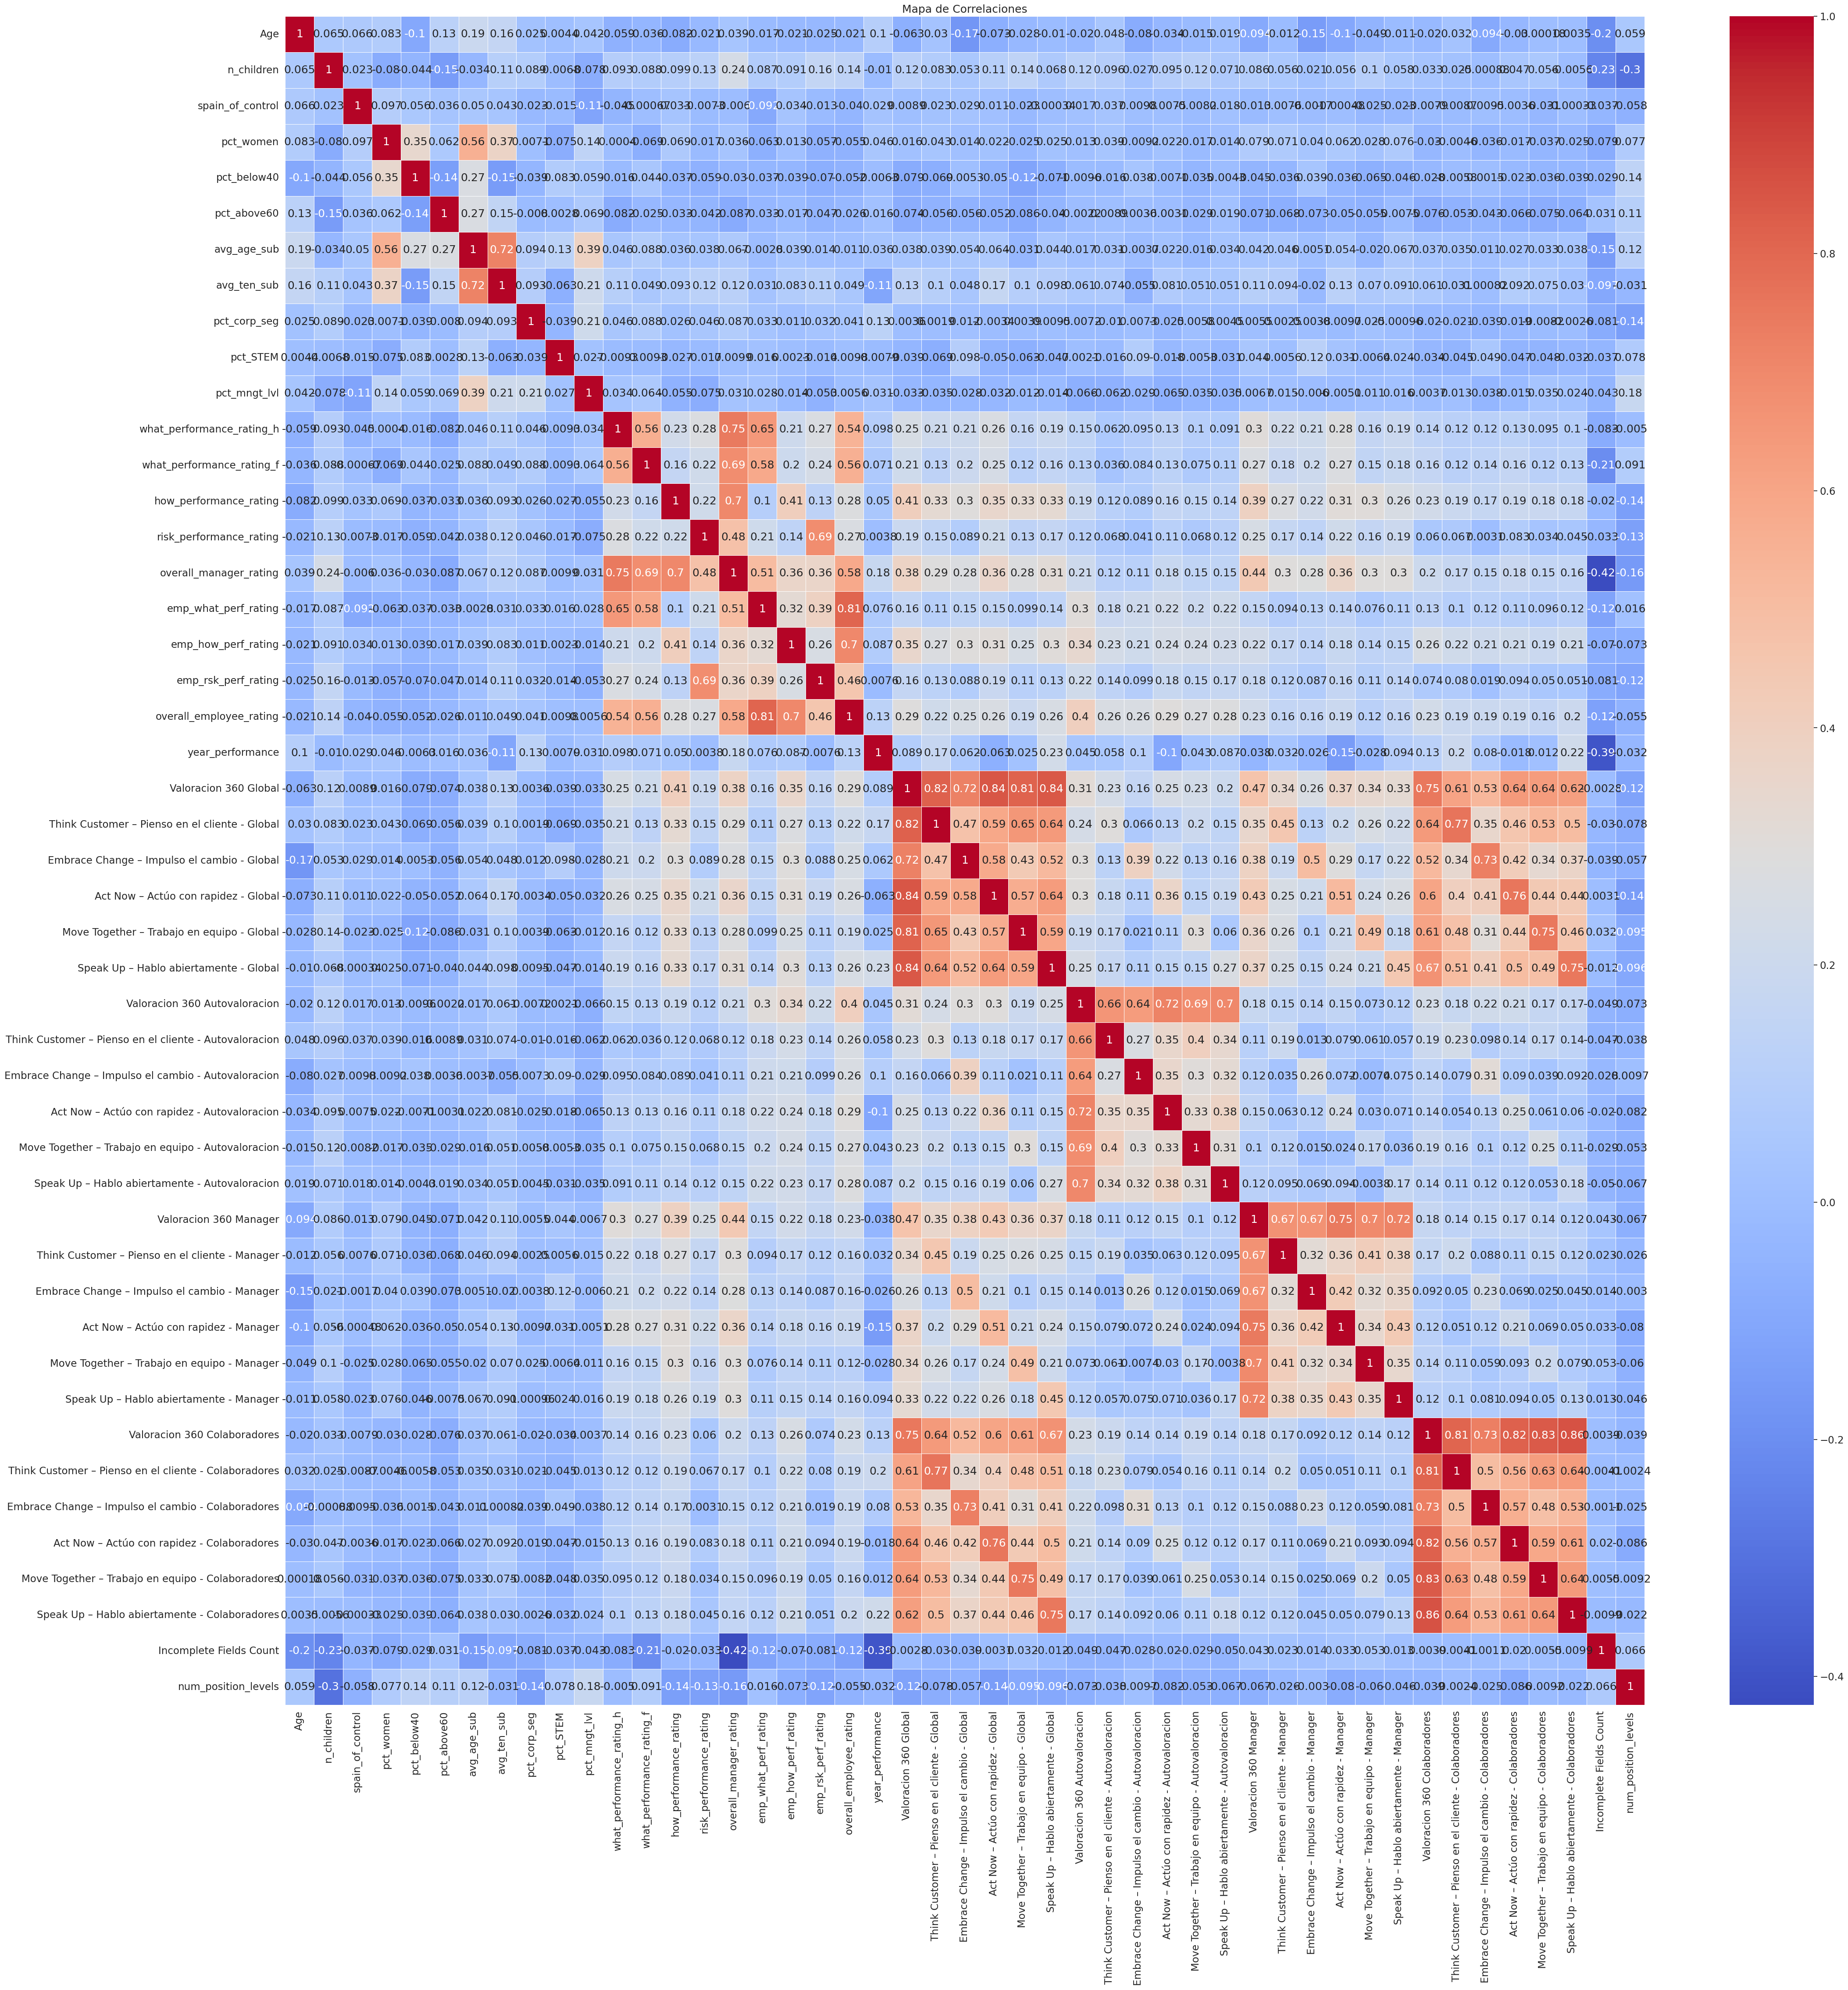

In [ ]:
#mapa de correlación general
plt.figure(figsize=(50, 50))
sns.heatmap(correlacion_df_completo, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()

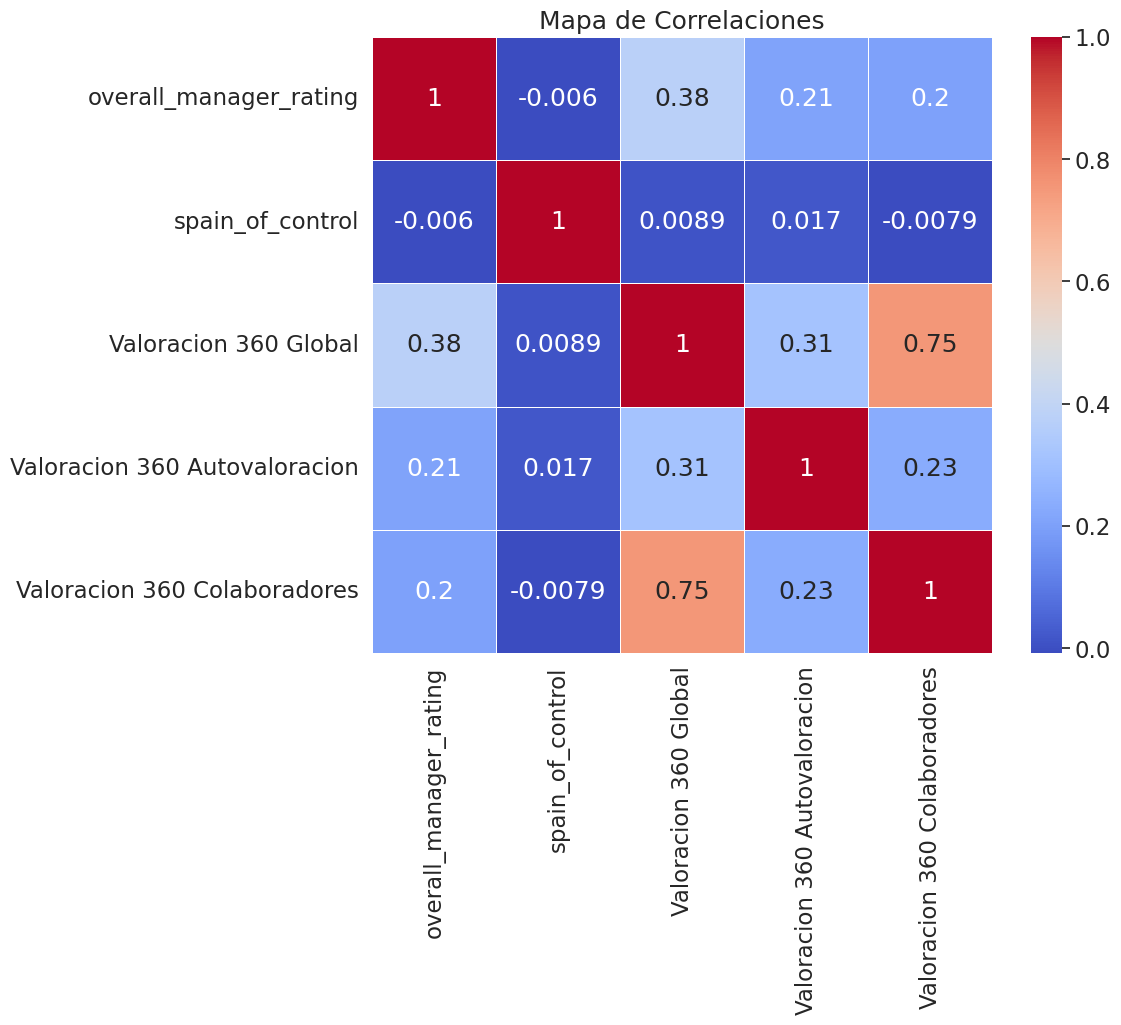

In [ ]:
#mapa correlación overall_manager_lebel
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_column, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()

In [ ]:
# Cantidad de valores únicos en la columna 'mar_status'
cantidad_valores_unicos = df_completo_01['mar_status'].nunique()

# Lista de valores únicos en la columna 'mar_status'
valores_unicos = df_completo_01['mar_status'].unique()

print("Cantidad de valores únicos en la columna 'mar_status':", cantidad_valores_unicos)
print("Lista de valores únicos en la columna 'mar_status':", valores_unicos)

Cantidad de valores únicos en la columna 'mar_status': 21
Lista de valores únicos en la columna 'mar_status': [nan 'Casado (M)' 'Soltero/ Soltero' 'Soltero/Divorciado'
 'Casado/Sociedad de Convivencia' 'Soltero/Otros' 'Soltero (S)' 'Married'
 'Divorced' 'Divorciado (D)' 'Viudo (W)' 'Pareja de Hecho Disuelta (V)'
 'Pareja de Hecho (C)' 'No Consta (U)' 'Cohabit' 'Single' 'Separado (E)'
 'Solteiro(a)' 'Divorciado(a)' 'Separado(a)' 'Viúvo(a)' 'Male (S)']


In [ ]:
# Cantidad de valores únicos en la columna 'field_study'
cantidad_valores_unicos = df_completo_01['field_study'].nunique()

# Lista de valores únicos en la columna 'field_study'
valores_unicos = df_completo_01['field_study'].unique()

print("Cantidad de valores únicos en la columna 'field_study':", cantidad_valores_unicos)
print("Lista de valores únicos en la columna 'field_study':", valores_unicos)

Cantidad de valores únicos en la columna 'field_study': 307
Lista de valores únicos en la columna 'field_study': ['Business Administration/Chemical Engineering' nan 'Accounting'
 'Business Administration/Finance'
 'Business Administration/Business Administration/Management/Finance/Risk Management'
 'Business Administration/Management/Computer Engineering'
 'Business Administration/Management' 'Accounting/Finance' 'Finance'
 'Actuarial Science/Finance/Organizational Behavior Studies'
 'Applied Mathematics/Economics/Human Development'
 'Criminology/Social Psychology'
 'Economics/Finance/Human Resources Management'
 'Business Administration/English/Marketing'
 'Economics/International Business'
 'Banking Management/Business Administration/Elementary Education/Information Technology/Managerial Economics/Organizational Leadership/Risk Management'
 'Business Administration/International Business'
 'Business Administration/Management/Finance'
 'Accounting/Business Administration/Management/Fi

In [ ]:
# Cantidad de valores únicos en la columna 'Management Level'
cantidad_valores_unicos = df_completo_01['Management Level'].nunique()

# Lista de valores únicos en la columna 'Management Level'
valores_unicos = df_completo_01['Management Level'].unique()

print("Cantidad de valores únicos en la columna 'Management Level':", cantidad_valores_unicos)
print("Lista de valores únicos en la columna 'Management Level':", valores_unicos)

Cantidad de valores únicos en la columna 'Management Level': 18
Lista de valores únicos en la columna 'Management Level': ['MLCS000' 'ML00001' 'MLM0002' 'MLB0200' 'MLSA001' 'MLAD000' 'MLM0001'
 'MLE0002' 'MLSA002' 'MLS0002' 'MLE0001' 'MLSA003' 'MLJA000' 'MLS0003'
 'MLA0003' 'MLBA010' 'MLB0100' 'MLS0001' nan]


In [ ]:
# Cantidad de valores únicos en la columna 'Job Family'
cantidad_valores_unicos = df_completo_01['Job Family'].nunique()

# Lista de valores únicos en la columna 'Job Family'
valores_unicos = df_completo_01['Job Family'].unique()

print("Cantidad de valores únicos en la columna 'Job Family':", cantidad_valores_unicos)
print("Lista de valores únicos en la columna 'Job Family':", valores_unicos)

Cantidad de valores únicos en la columna 'Job Family': 175
Lista de valores únicos en la columna 'Job Family': ['Top Management/Executives\n\nTop Management / Executives'
 'IT - Delivery\n\nProject Management' 'Top Management / Executives'
 'Internal Control (1st LoD)\n\nRisk Management'
 'Staff\n\nStrategy & Corporate Development'
 'Internal Control (2nd and 3rd LoD)\n\nRisk'
 'Retail Banking\n\nRetail Banking - Customer Facing'
 'Analysis & Control\n\nManagement Control'
 'Commercial Development\n\nRetail Banking - Non Customer Facing'
 'Top Management/Executives'
 'Business/Corporate Banking\n\nRetail Banking - Customer Facing'
 'Legal\n\nSupport' 'Human Resources\n\nSupport'
 'IT - Enterprise\n\nManagement & Control IT' 'Banker\n\nCIB - Coverage'
 'Consumer Finance\n\nConsumer Financing Services'
 'Business Development\n\nCIB - Support/Monitoring'
 'Operations\n\nSupport'
 'Retail Banking - Customer Facing\n\nRetail Product'
 'CIB - Coverage\n\nSales' 'IT - Delivery\n\nSoftware Del

Para unificar el valor de "Job Family" de cada "ID" al valor de "Job Family" cuando "year_performance" = 2022 según la decisión tomada de tener sólo en cuenta el valor actual vigente del "Job Family":

1. Primero, vamos a filtrar el DataFrame para obtener solo las filas que tienen "year_performance" igual a 2022.
2. Luego, vamos a crear un diccionario que mapee cada "ID" al valor de "Job Family" correspondiente para el año 2022.
3. Finalmente, actualizaremos el DataFrame utilizando el diccionario creado para unificar el valor de "Job Family" de cada "ID".

Después de ejecutar este código, el DataFrame `df_completo_01` tendrá la columna "Job Family" actualizada con los valores unificados de 2022 para cada "ID".

In [ ]:
df_completo_01.shape

(6616, 74)

In [ ]:
df_completo_01.columns

Index(['ID', 'Gender', 'Country of Origin', 'Age', 'Tenure', 'Job Family',
       'Position Level 1', 'Position Level 2', 'Position Level 3',
       'Position Level 4', 'Position Level 5', 'Position Level 6',
       'Position Level 7', 'Position Level 8', 'Management Level',
       'Corporate Segment', 'Negocio/ No Negocio', 'mar_status', 'n_children',
       'field_study', 'spain_of_control', 'pct_women', 'pct_below40',
       'pct_above60', 'avg_age_sub', 'avg_ten_sub', 'pct_corp_seg', 'pct_STEM',
       'pct_mngt_lvl', 'what_performance_rating_h', 'what_performance_label_h',
       'what_performance_rating_f', 'what_performance_label_f',
       'how_performance_rating', 'how_performance_label',
       'risk_performance_rating', 'risk_performance_label',
       'overall_manager_rating', 'overall_manager_label',
       'emp_what_perf_rating', 'emp_what_perf_label', 'emp_how_perf_rating',
       'emp_how_perf_label', 'emp_rsk_perf_rating', 'emp_rsk_perf_label',
       'overall_employee

In [ ]:
# Paso 1: Filtrar las filas con "year_performance" igual a 2022
df_2022 = df_completo_01[df_completo_01['year_performance'] == 2022]

# Paso 2: Crear un diccionario que mapee cada "ID" al valor de "Job Family" de 2022
id_to_job_family_2022 = df_2022.set_index('ID')['Job Family'].to_dict()

# Paso 3: Actualizar el DataFrame original con los valores unificados de "Job Family"
df_completo_01['Job Family'] = df_completo_01['ID'].map(id_to_job_family_2022)

# Imprimir los valores únicos después de la actualización
cantidad_valores_unicos = df_completo_01['Job Family'].nunique()
valores_unicos = df_completo_01['Job Family'].unique()

print("Cantidad de valores únicos en la columna 'Job Family':", cantidad_valores_unicos)
print("Lista de valores únicos en la columna 'Job Family':", valores_unicos)



Cantidad de valores únicos en la columna 'Job Family': 53
Lista de valores únicos en la columna 'Job Family': ['Compliance' 'Data Management & Governance' 'Accounting' 'Top Management'
 'Data Analytics & Models' 'Credit Risk'
 'Product & Service Value Proposition Management' 'Customer S&S: F2F'
 'Debt Finance' 'EWRM' 'Project' 'Strategy & Corporate Development'
 'Properties & Gral. Services' 'Marketing' 'Investment & Asset Management'
 'Non-financial Risk' 'Operations' 'Procurement & Third Party Cost Mgmt.'
 'Communication' nan 'Capital' 'Distribution Management'
 'Analysis & Control' 'Market & Structural Risk' 'Tax' 'Legal'
 'Business Development & Partnerships' 'Recovery & Collections'
 'Commercial & Business Banker' 'HR Management' 'Financial Management'
 'M&A' 'Product & IT Project Management' 'Service & Delivery Management'
 'Technology Risk & Cybersecurity' 'Research and Business Intelligence'
 'Transaction Banking' 'Banker' 'Sales' 'Governance'
 'Solution Application, Infrastruc

In [ ]:
#Filtrar las entradas con "ID" igual a "AA001" para comprobar que el Job Family es igual en los tres años
filtro = df_completo_01["ID"] == "AA001"
entradas_con_id_concreto = df_completo_01[filtro]
print(entradas_con_id_concreto)

         ID Gender Country of Origin  Age     Tenure  Job Family  \
0     AA001   Male            Mexico   55 2019-05-31  Compliance   
2127  AA001   Male            Mexico   56 2019-05-31  Compliance   
4356  AA001   Male            Mexico   57 2019-05-31  Compliance   

           Position Level 1  Position Level 2             Position Level 3  \
0     Santander Departments  Santander México    Nodo Raíz Árbol Seguridad   
2127  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   
4356  Santander Departments  Santander México  Presidente Ejec Dir Gral GF   

             Position Level 4  ...  \
0     DE Contraloria Norm CCO  ...   
2127               DG Riesgos  ...   
4356               DG Riesgos  ...   

     Move Together – Trabajo en equipo - Manager  \
0                                            2.0   
2127                                         2.0   
4356                                         2.0   

     Speak Up – Hablo abiertamente - Manager Valorac

La función revisa cuál es el valor de "Job Family" y lo incluye en una nueva columna que indica el "Job Family Group" correspondiente

In [ ]:
#Definir la función para obtener el grupo de "Job Family"
def get_job_family_group(job_family):
    if job_family in ['Distribution Management', 'Customer S&S: F2F', 'Customer S&S: Remote', 'Customer S&S: Specialized products', 'Commercial & Business Banker', 'Banker', 'Sales', 'Transaction Banking', 'Debt Finance', 'M&A', 'Investment & Asset Management']:
        return "Customer Facing"
    elif job_family in ['Research and Business Intelligence', 'Product & Service Value Proposition Management', 'Business Development & Partnerships', 'Trading', 'Middle Office']:
        return "Non-customer Facing"
    elif job_family in ['Audit', 'Compliance', 'Recovery & Collections', 'EWRM', 'Credit Risk', 'Market & Structural Risk', 'Non-financial Risk']:
        return "Internal Control"
    elif job_family in ['Accounting', 'Analysis & Control', 'Financial Management', 'Capital']:
        return "Management Control"
    elif job_family in ['Software Engineering', 'Systems Infrastructure & Communication Platforms']:
        return "IT Delivery"
    elif job_family in ['Product & IT Project Management']:
        return "Product & IT Project Management"
    elif job_family in ['Solution Application, Infrastructure & Data Architecture', 'Technology Risk & Cybersecurity']:
        return "IT Enterprise"
    elif job_family in ['Service & Delivery Management', 'End User Technologies']:
        return "Service Support"
    elif job_family in ['Data Analytics & Models', 'Data Management & Governance']:
        return "Data"
    elif job_family in ['Admin & Support', 'Properties & Gral. Services', 'Procurement & Third Party Cost Mgmt.']:
        return "General Services"
    elif job_family in ['HR Specialist', 'HR Management']:
        return "Human Resources"
    elif job_family in ['Operations']:
        return "Operations"
    elif job_family in ['Investor Relations', 'Supervisory & Public Stakeholder Management', 'Communication', 'Marketing']:
        return "Skateholder Management & Marketing"
    elif job_family in ['Tax', 'Legal', 'Governance']:
        return "Counsel & Governance"
    elif job_family in ['Top Management', 'Strategy & Corporate Development', 'Project', 'Early Careers']:
        return "Other Staff & Support"
    else:
        return None

#Agregar una nueva columna "Job Family Group" al DataFrame
df_completo_01["Job Family Group"] = df_completo_01["Job Family"].apply(get_job_family_group)

La función revisa cuál es el valor de "Job Family Group" y lo incluye en una columna nueva que indica el "Job Family Category" correspondiente

In [ ]:
#Definir la función para obtener "Job Family Category"
def get_job_family_category(job_family_group):
    if job_family_group in ['Customer Facing', 'Non-customer Facing']:
        return "Business"
    elif job_family_group in ['Internal Control', 'Management Control']:
        return "Control & Oversight"
    elif job_family_group in ['T Delivery', 'Product & IT Project Management', 'IT Enterprise', 'Service Support', 'Data', 'General Services', 'Human Resources', 'Operations', 'Skateholder Management & Marketing', 'Counsel & Governance', 'Other Staff & Support']:
        return "Staff & Support"
    else:
        return None

#Agregar una nueva columna "Job Family Group" al DataFrame
df_completo_01["Job Family Category"] = df_completo_01["Job Family Group"].apply(get_job_family_category)

In [ ]:
df_completo_01.shape

(6616, 76)

##Convertimos en categórica la variable "Gender"

In [ ]:
#Codificación one-hot para 'Gender'
df_completo_01_encoded = pd.get_dummies(df_completo_01, columns=["Gender"],prefix="")

In [ ]:
df_completo_01_encoded.shape

(6616, 77)

In [ ]:
df_completo_01_encoded.head(3)

ID Country of Origin  Age     Tenure                    Job Family  \
0  AA001            Mexico   55 2019-05-31                    Compliance   
1  AA002         Argentina   42 2022-10-01  Data Management & Governance   
2  AA003            Mexico   56 1996-08-27                    Accounting   

        Position Level 1  Position Level 2           Position Level 3  \
0  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   
1  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   
2  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   

          Position Level 4 Position Level 5  ...  \
0  DE Contraloria Norm CCO              NaN  ...   
1       Chief Data Officer              NaN  ...   
2     Intervencion General              NaN  ...   

  Embrace Change – Impulso el cambio - Colaboradores  \
0                                           4.000000   
1                                                NaN   
2                                           3.666667   

  Act Now – Actúo con rapidez - Colaboradores  \
0                                    3.500000   
1                                         NaN   
2                                    3.333333   

  Move Together – Trabajo en equipo - Colaboradores  \
0                                             3.625   
1                                               NaN   
2                                             3.250   

  Speak Up – Hablo abiertamente - Colaboradores Incomplete Fields Count  \
0                                      3.750000                       5   
1                                           NaN                      29   
2                                      3.083333                       9   

  num_position_levels    Job Family Group  Job Family Category _Female  _Male  
0                   4    Internal Control  Control & Oversight       0      1  
1                   4                Data      Staff & Support       0      1  
2                   4  Management Control  Control & Oversight       0      1  

[3 rows x 77 columns]

##Para convertir las variables categóricas "Job Family Group" y "Job Family Category" en variables cuantitativas, puedes usar la técnica de codificación one-hot o de etiquetado numérico:







1.   Codificación one-hot: La codificación one-hot crea una columna binaria para cada categoría en la variable original. Cada columna binaria representa la presencia o ausencia de la categoría en la observación. Se puede hacer esto usando la función get_dummies de pandas para la columna "Job Family Group" y la columna "Job Family Category":



In [ ]:
#Codificación one-hot para 'Job Family Group'
df_completo_01_ohe = pd.get_dummies(df_completo_01_encoded, columns=["Job Family Group"], prefix="JFG")

In [ ]:
df_completo_01_ohe.shape


(6616, 91)

In [ ]:
# Codificación one-hot para 'Job Family Category'
df_completo_01_ohe = pd.get_dummies(df_completo_01_ohe, columns=["Job Family Category"], prefix="JFC")

In [ ]:
df_completo_01_ohe.shape

(6616, 93)

In [ ]:
df_completo_01_ohe.head(3)

ID Country of Origin  Age     Tenure                    Job Family  \
0  AA001            Mexico   55 2019-05-31                    Compliance   
1  AA002         Argentina   42 2022-10-01  Data Management & Governance   
2  AA003            Mexico   56 1996-08-27                    Accounting   

        Position Level 1  Position Level 2           Position Level 3  \
0  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   
1  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   
2  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   

          Position Level 4 Position Level 5  ... JFG_Management Control  \
0  DE Contraloria Norm CCO              NaN  ...                      0   
1       Chief Data Officer              NaN  ...                      0   
2     Intervencion General              NaN  ...                      1   

  JFG_Non-customer Facing JFG_Operations JFG_Other Staff & Support  \
0                       0              0                         0   
1                       0              0                         0   
2                       0              0                         0   

  JFG_Product & IT Project Management JFG_Service Support  \
0                                   0                   0   
1                                   0                   0   
2                                   0                   0   

  JFG_Skateholder Management & Marketing  JFC_Business  \
0                                      0             0   
1                                      0             0   
2                                      0             0   

  JFC_Control & Oversight  JFC_Staff & Support  
0                       1                    0  
1                       0                    1  
2                       1                    0  

[3 rows x 93 columns]



2.   Etiquetado numérico: El etiquetado numérico asigna un número entero a cada categoría en función de su posición en la lista de categorías. Se puede usar el método factorize de pandas para realizar el etiquetado numérico:



In [ ]:
df_completo_01_et_num=df_completo_01.copy()

In [ ]:
#Etiquetado numérico para 'Job Family Group'
df_completo_01_et_num["JFG_numerical"] = pd.factorize(df_completo_01_encoded["Job Family Group"])[0]

In [ ]:
df_completo_01_et_num.shape

(6616, 77)

In [ ]:
# Etiquetado numérico para 'Job Family Category'
df_completo_01_et_num["JFC_numerical"] = pd.factorize(df_completo_01_et_num["Job Family Category"])[0]

In [ ]:
df_completo_01_et_num.shape

(6616, 78)

In [ ]:
df_completo_01_et_num.head(3)

ID Gender Country of Origin  Age     Tenure  \
0  AA001   Male            Mexico   55 2019-05-31   
1  AA002   Male         Argentina   42 2022-10-01   
2  AA003   Male            Mexico   56 1996-08-27   

                     Job Family       Position Level 1  Position Level 2  \
0                    Compliance  Santander Departments  Santander México   
1  Data Management & Governance  Santander Departments  Santander México   
2                    Accounting  Santander Departments  Santander México   

            Position Level 3         Position Level 4  ...  \
0  Nodo Raíz Árbol Seguridad  DE Contraloria Norm CCO  ...   
1  Nodo Raíz Árbol Seguridad       Chief Data Officer  ...   
2  Nodo Raíz Árbol Seguridad     Intervencion General  ...   

  Embrace Change – Impulso el cambio - Colaboradores  \
0                                           4.000000   
1                                                NaN   
2                                           3.666667   

  Act Now – Actúo con rapidez - Colaboradores  \
0                                    3.500000   
1                                         NaN   
2                                    3.333333   

  Move Together – Trabajo en equipo - Colaboradores  \
0                                             3.625   
1                                               NaN   
2                                             3.250   

  Speak Up – Hablo abiertamente - Colaboradores Incomplete Fields Count  \
0                                      3.750000                       5   
1                                           NaN                      29   
2                                      3.083333                       9   

  num_position_levels    Job Family Group  Job Family Category  JFG_numerical  \
0                   4    Internal Control  Control & Oversight              0   
1                   4                Data      Staff & Support              1   
2                   4  Management Control  Control & Oversight              2   

  JFC_numerical  
0             0  
1             1  
2             0  

[3 rows x 78 columns]

ESTUDIO DE  LA RELACIÓN DE LAS JOB FAMILY CON LEVESHNTEIN

In [ ]:
#Dado que en el caso de las job family ha habido cambios en la denominación de las mismas en el año 2022 con respecto
#a las existentes en los años 2020 y 2021, vamos a buscar la relación que puede existir entre estas nuevas familias
#y las existentes con anterioridad. Para ello vamos a utilizar la distancia de Levenshtein y calcular la posible similitud
#entre las diferentes familias.
#En primer lugar vamos a transformar algunos de los datos que aparecen con acrónimos en su correspondiente traducción.


In [ ]:
df_2022.loc[df_2022['Job Family'] == 'EWRM', 'Job Family'] = 'Enterprise Wide Risk Management'
df_2022.loc[df_2022['Job Family'] == 'CIB', 'Job Family'] = 'Corporate and Investment bank'
df_2022.loc[df_2022['Job Family'] == 'M&A', 'Job Family'] = 'Merger and Acquistions'

In [ ]:
df_jobfamily_22=df_2022.filter(['Job Family'])
df_jobfamily_22


Job Family
4356                    Compliance
4357  Data Management & Governance
4358                    Accounting
4359                Top Management
4360       Data Analytics & Models
...                            ...
6611                Top Management
6612                Top Management
6613                Top Management
6614                Top Management
6615                Top Management

[2260 rows x 1 columns]

Renombramos la columna de Job Family



In [ ]:
df_jobfamily_22.columns = ['JobFamily_22' if x=='Job Family' else x for x in df_jobfamily_22.columns]
df_jobfamily_22

JobFamily_22
4356                    Compliance
4357  Data Management & Governance
4358                    Accounting
4359                Top Management
4360       Data Analytics & Models
...                            ...
6611                Top Management
6612                Top Management
6613                Top Management
6614                Top Management
6615                Top Management

[2260 rows x 1 columns]

In [ ]:
df_2021.loc[df_2021['Job Family'] == 'EWRM', 'Job Family'] = 'Enterprise Wide Risk Management'
df_2021.loc[df_2021['Job Family'] == 'CIB', 'Job Family'] = 'Corporate and Investment bank'
df_2021.loc[df_2021['Job Family'] == 'M&A', 'Job Family'] = 'Merger and Acquistions'

In [ ]:
df_jobfamily_21=df_2021.filter(['Job Family'])
df_jobfamily_21


Job Family
0        Top Management (NEW)
1        Top Management (NEW)
2        Top Management (NEW)
3        Top Management (NEW)
4        Top Management (NEW)
...                       ...
2224     Top Management (NEW)
2225     Top Management (NEW)
2226  Customer S&S: F2F (NEW)
2227     Top Management (NEW)
2228     Top Management (NEW)

[2229 rows x 1 columns]

Eliminamos (NEW) en el dataset de 2021 ya que no aporta valor alguno al análisis:

In [ ]:
df_jobfamily_21 ['Job Family']=df_jobfamily_21 ['Job Family'].str.strip('(NEW)')
df_jobfamily_21

Job Family
0        Top Management 
1        Top Management 
2        Top Management 
3        Top Management 
4        Top Management 
...                  ...
2224     Top Management 
2225     Top Management 
2226  Customer S&S: F2F 
2227     Top Management 
2228     Top Management 

[2229 rows x 1 columns]

In [ ]:
df_jobfamily_22['JobFamily_22'] =df_jobfamily_22['JobFamily_22'].astype(str)

Renombramos la columna de Job Family



In [ ]:
df_jobfamily_21.columns = ['JobFamily_21' if x=='Job Family' else x for x in df_jobfamily_21.columns]
df_jobfamily_21

JobFamily_21
0        Top Management 
1        Top Management 
2        Top Management 
3        Top Management 
4        Top Management 
...                  ...
2224     Top Management 
2225     Top Management 
2226  Customer S&S: F2F 
2227     Top Management 
2228     Top Management 

[2229 rows x 1 columns]

In [ ]:
df_jobfamily_21['JobFamily_21'] =df_jobfamily_21['JobFamily_21'].astype(str)


Ahora con las dos columnas de los años 2021 y 2022 preparadas con los datos limpios, realizamos el cálculo de la distancia de Levenshtein para intentar relacionar las familias de 2021 con las nuevas creadas en 2022

In [ ]:
!pip install Levenshtein
import Levenshtein
from itertools import product

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.7 MB/s eta 0:00:00


In [ ]:
levenshtein_distances = []

for index, row1 in df_jobfamily_21.iterrows():
    for index, row2 in df_jobfamily_22.iterrows():
        distance = Levenshtein.distance(row1['JobFamily_21'], row2['JobFamily_22'])
        levenshtein_distances.append(distance)

In [ ]:
distance_df = pd.DataFrame({'Levenshtein_Distance': levenshtein_distances})
distance_df


Levenshtein_Distance
0                          11
1                          16
2                          13
3                           1
4                          20
...                       ...
5037535                     1
5037536                     1
5037537                     1
5037538                     1
5037539                     1

[5037540 rows x 1 columns]

Dada la disparidad entre las nuevas familias del 2022 y las anteriores,no nos es posible establecer una relación entre ellas; hemos hecho este mismo análisis "a mano" en excel con idénticos resultados. Por ello establecemos las familias del 2022 como las definitivas y las trasladamos a los años anteriores, a riesgo de perder cierta trazabilidad pero que asumimos como poco importante a la hora de realizar análisis posteriores.


ANÁLISIS DE CORRELACIÓN DE LAS VARIABLES DEL DATAFRAME CON ONE HOT ENCODING

Una vez transformado las variables categóricas en variables numéricas mediante one hot encoding en el dataframe, ralizaremos un análisis de correlación teniendo en cuenta los valores por encima de 0.7.

In [ ]:
df = df_completo_01_et_num
correlation_matrix = df.corr()

<ipython-input-106-6b4a03161c1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


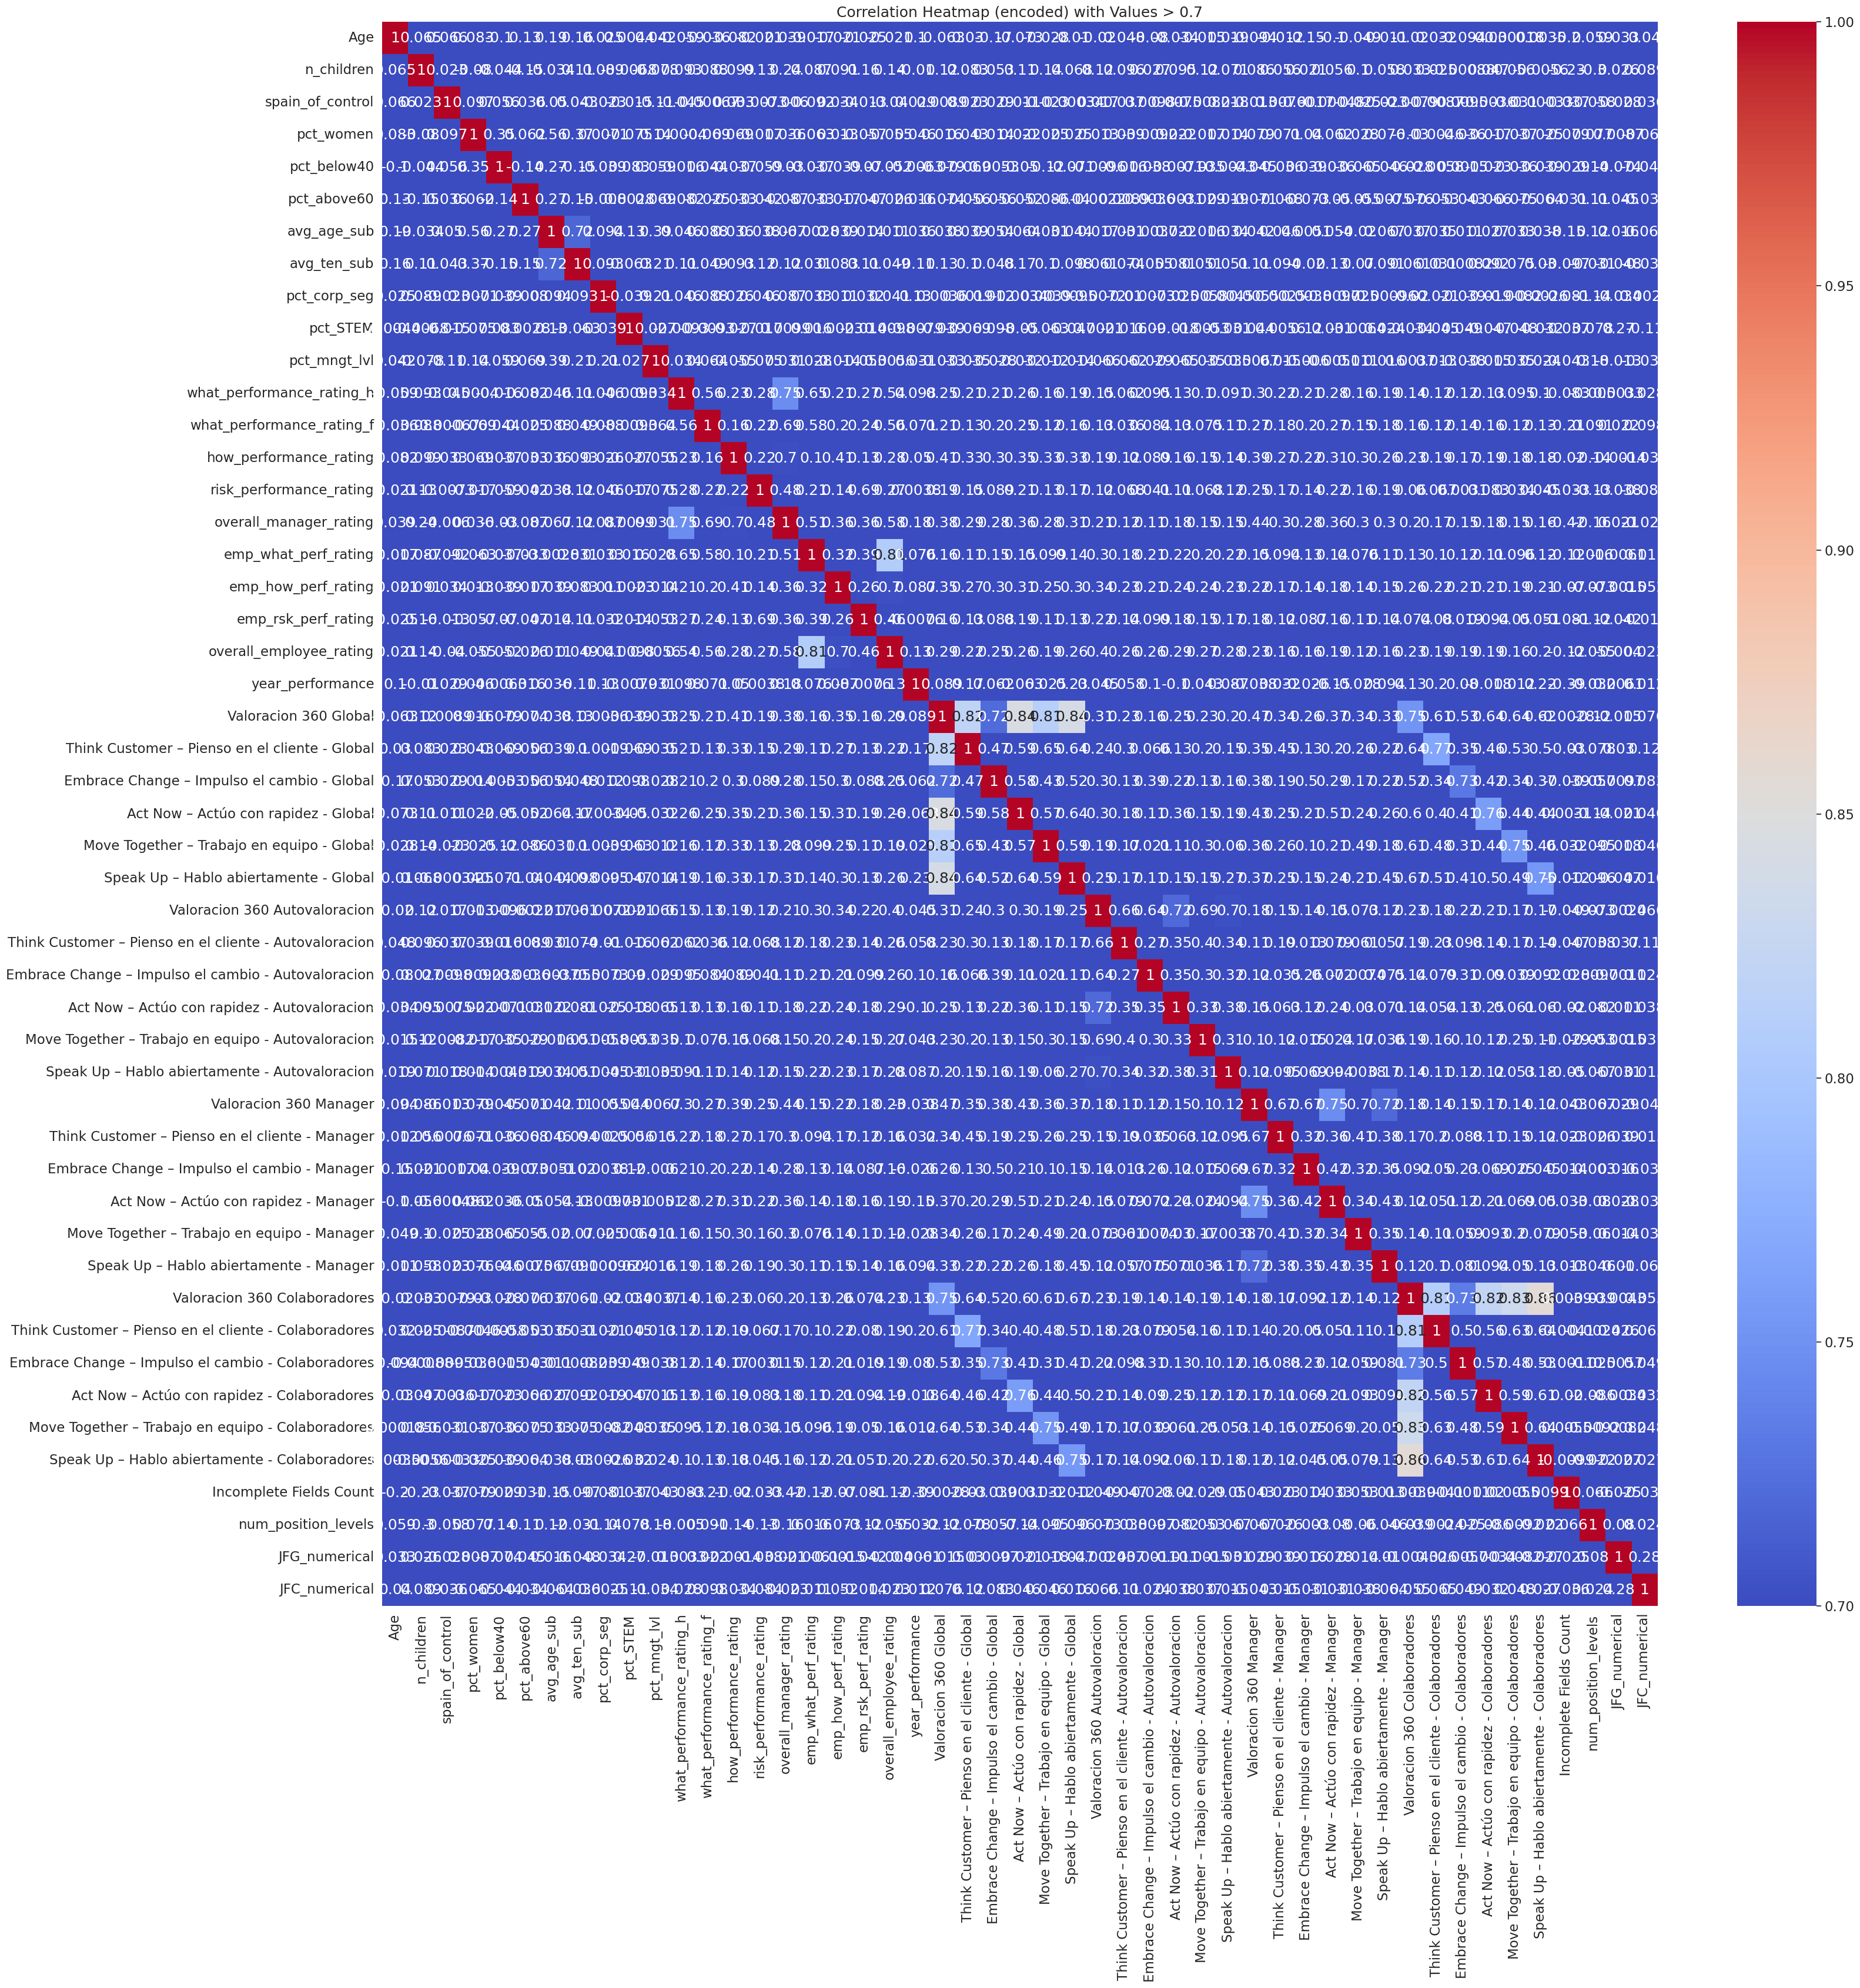

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0.7)
plt.title('Correlation Heatmap (encoded) with Values > 0.7')
plt.show()

In [ ]:
df_completo_01_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6616 entries, 0 to 6615
Data columns (total 93 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   ID                                                      6616 non-null   object        
 1   Country of Origin                                       5001 non-null   object        
 2   Age                                                     6616 non-null   int64         
 3   Tenure                                                  6616 non-null   datetime64[ns]
 4   Job Family                                              6555 non-null   object        
 5   Position Level 1                                        6589 non-null   object        
 6   Position Level 2                                        6589 non-null   object        
 7   Position Level 3                                        6570

In [ ]:
columns_to_normalize=['n_children','spain_of_control','pct_women','pct_below40','pct_above60','avg_age_sub','avg_ten_sub','pct_corp_seg','pct_STEM',
         'pct_mngt_lvl','what_performance_rating_h','what_performance_rating_f','how_performance_rating',
         'risk_performance_rating','overall_manager_rating','emp_what_perf_rating','emp_how_perf_rating','emp_rsk_perf_rating','overall_employee_rating','Valoracion 360 Global',
         'Think Customer – Pienso en el cliente - Global','Embrace Change – Impulso el cambio - Global','Act Now – Actúo con rapidez - Global','Move Together – Trabajo en equipo - Global',
         'Speak Up – Hablo abiertamente - Global','Valoracion 360 Autovaloracion','Think Customer – Pienso en el cliente - Autovaloracion','Embrace Change – Impulso el cambio - Autovaloracion',
         'Act Now – Actúo con rapidez - Autovaloracion','Move Together – Trabajo en equipo - Autovaloracion','Speak Up – Hablo abiertamente - Autovaloracion','Valoracion 360 Manager',
         'Think Customer – Pienso en el cliente - Manager','Embrace Change – Impulso el cambio - Manager','Act Now – Actúo con rapidez - Manager','Move Together – Trabajo en equipo - Manager',
         'Speak Up – Hablo abiertamente - Manager','Valoracion 360 Colaboradores','Think Customer – Pienso en el cliente - Colaboradores','Embrace Change – Impulso el cambio - Colaboradores',
         'Act Now – Actúo con rapidez - Colaboradores','Move Together – Trabajo en equipo - Colaboradores','Speak Up – Hablo abiertamente - Colaboradores']

In [ ]:
data_to_normalize = df_completo_01_ohe[columns_to_normalize]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(data_to_normalize)


In [ ]:
scaled_df.shape

(6616, 43)

In [ ]:
print(columns_to_normalize)

['n_children', 'spain_of_control', 'pct_women', 'pct_below40', 'pct_above60', 'avg_age_sub', 'avg_ten_sub', 'pct_corp_seg', 'pct_STEM', 'pct_mngt_lvl', 'what_performance_rating_h', 'what_performance_rating_f', 'how_performance_rating', 'risk_performance_rating', 'overall_manager_rating', 'emp_what_perf_rating', 'emp_how_perf_rating', 'emp_rsk_perf_rating', 'overall_employee_rating', 'Valoracion 360 Global', 'Think Customer – Pienso en el cliente - Global', 'Embrace Change – Impulso el cambio - Global', 'Act Now – Actúo con rapidez - Global', 'Move Together – Trabajo en equipo - Global', 'Speak Up – Hablo abiertamente - Global', 'Valoracion 360 Autovaloracion', 'Think Customer – Pienso en el cliente - Autovaloracion', 'Embrace Change – Impulso el cambio - Autovaloracion', 'Act Now – Actúo con rapidez - Autovaloracion', 'Move Together – Trabajo en equipo - Autovaloracion', 'Speak Up – Hablo abiertamente - Autovaloracion', 'Valoracion 360 Manager', 'Think Customer – Pienso en el cliente -

In [ ]:
data_to_normalize.shape

(6616, 43)

In [ ]:
df_completo_01_ohe.shape


(6616, 93)

In [ ]:
df_completo_01_ohe_scaled = pd.DataFrame(scaled_df, columns=columns_to_normalize)

In [ ]:
df_completo_01_ohe.head(3)

ID Country of Origin  Age     Tenure                    Job Family  \
0  AA001            Mexico   55 2019-05-31                    Compliance   
1  AA002         Argentina   42 2022-10-01  Data Management & Governance   
2  AA003            Mexico   56 1996-08-27                    Accounting   

        Position Level 1  Position Level 2           Position Level 3  \
0  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   
1  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   
2  Santander Departments  Santander México  Nodo Raíz Árbol Seguridad   

          Position Level 4 Position Level 5  ... JFG_Management Control  \
0  DE Contraloria Norm CCO              NaN  ...                      0   
1       Chief Data Officer              NaN  ...                      0   
2     Intervencion General              NaN  ...                      1   

  JFG_Non-customer Facing JFG_Operations JFG_Other Staff & Support  \
0                       0              0                         0   
1                       0              0                         0   
2                       0              0                         0   

  JFG_Product & IT Project Management JFG_Service Support  \
0                                   0                   0   
1                                   0                   0   
2                                   0                   0   

  JFG_Skateholder Management & Marketing  JFC_Business  \
0                                      0             0   
1                                      0             0   
2                                      0             0   

  JFC_Control & Oversight  JFC_Staff & Support  
0                       1                    0  
1                       0                    1  
2                       1                    0  

[3 rows x 93 columns]

In [ ]:
df_completo_01_ohe_scaled.head(10)

n_children  spain_of_control  pct_women  pct_below40  pct_above60  \
0    0.333333          0.004751   0.379562     0.766423     0.026483   
1    1.000000          0.002254   0.507692     0.892308     0.000000   
2    0.333333          0.002982   0.360465     0.511628     0.000000   
3    0.111111          0.002843   0.500000     0.487805     0.044246   
4    0.444444          0.001768   0.627451     0.411765     0.000000   
5    0.333333          0.000000   0.000000     0.000000     0.000000   
6    0.444444          0.001075   0.806452     0.870968     0.000000   
7    0.333333          0.000485   0.571429     0.857143     0.000000   
8    0.333333          0.024586   0.383639     0.507757     0.030704   
9    0.444444          0.002635   0.223684     0.500000     0.079565   

   avg_age_sub  avg_ten_sub  pct_corp_seg  pct_STEM  pct_mngt_lvl  ...  \
0     0.480265     0.203496           0.0  0.021898      0.065693  ...   
1     0.418870     0.182594           0.0  1.000000      0.061538  ...   
2     0.540374     0.421929           0.0  0.953488      0.093023  ...   
3     0.544077     0.368257           0.0  0.109756      0.243902  ...   
4     0.558224     0.417560           0.0  0.490196      0.058824  ...   
5     0.000000     0.000000           0.0  0.000000      0.000000  ...   
6     0.484085     0.183453           0.0  0.903226      0.225806  ...   
7     0.424275     0.167786           0.0  0.000000      0.000000  ...   
8     0.541881     0.271589           0.0  0.104372      0.052186  ...   
9     0.548297     0.423764           0.0  0.000000      0.513158  ...   

   Embrace Change – Impulso el cambio - Manager  \
0                                      0.333333   
1                                           NaN   
2                                      1.000000   
3                                      1.000000   
4                                           NaN   
5                                      0.333333   
6                                      1.000000   
7                                           NaN   
8                                           NaN   
9                                      0.333333   

   Act Now – Actúo con rapidez - Manager  \
0                               0.333333   
1                                    NaN   
2                               0.833333   
3                               1.000000   
4                                    NaN   
5                               0.333333   
6                               1.000000   
7                                    NaN   
8                                    NaN   
9                               0.666667   

   Move Together – Trabajo en equipo - Manager  \
0                                     0.333333   
1                                          NaN   
2                                     0.500000   
3                                     0.666667   
4                                          NaN   
5                                     0.500000   
6                                     0.833333   
7                                          NaN   
8                                          NaN   
9                                     0.333333   

   Speak Up – Hablo abiertamente - Manager  Valoracion 360 Colaboradores  \
0                                 0.500000                      0.837838   
1                                      NaN                           NaN   
2                                 1.000000                      0.675676   
3                                 0.833333                      0.540541   
4                                      NaN                           NaN   
5                                 0.333333                      0.837838   
6                                 0.833333                      0.432432   
7                                      NaN                           NaN   
8                                      NaN                           NaN   
9                                 0.6

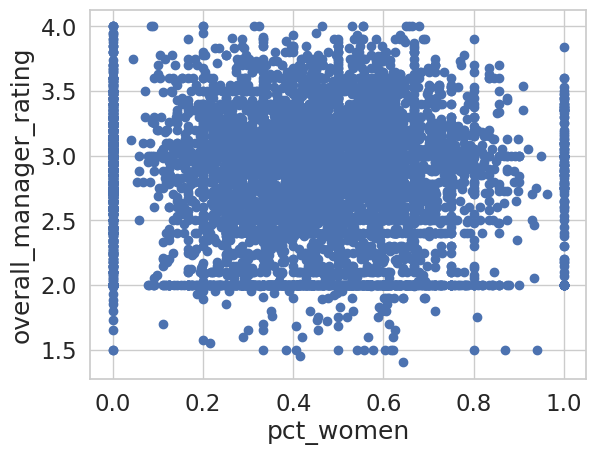

In [ ]:
# Veamos la asociación entre:
plt.scatter(df_completo_01_ohe['pct_women'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('pct_women')
plt.ylabel('overall_manager_rating')
plt.show()

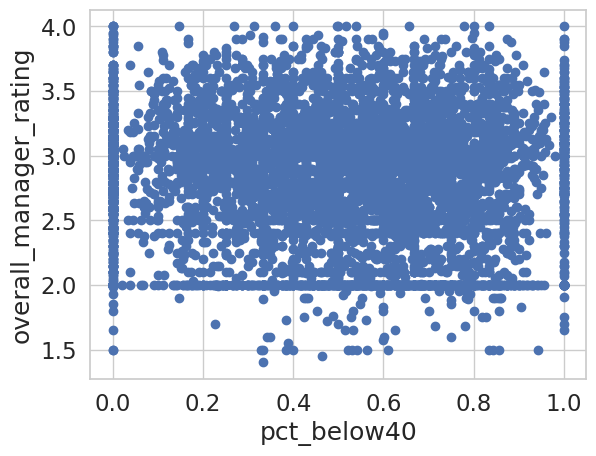

In [ ]:
plt.scatter(df_completo_01_ohe['pct_below40'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('pct_below40')
plt.ylabel('overall_manager_rating')
plt.show()

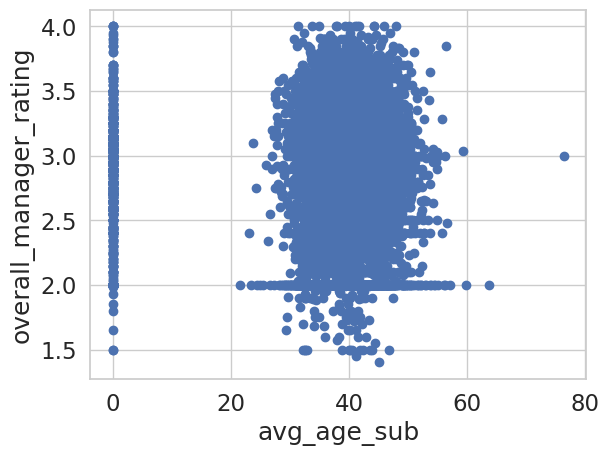

In [ ]:
plt.scatter(df_completo_01_ohe['avg_age_sub'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('avg_age_sub')
plt.ylabel('overall_manager_rating')
plt.show()

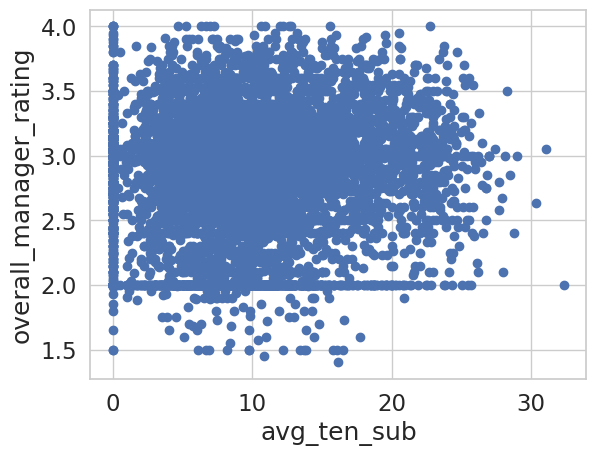

In [ ]:
plt.scatter(df_completo_01_ohe['avg_ten_sub'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('avg_ten_sub')
plt.ylabel('overall_manager_rating')
plt.show()

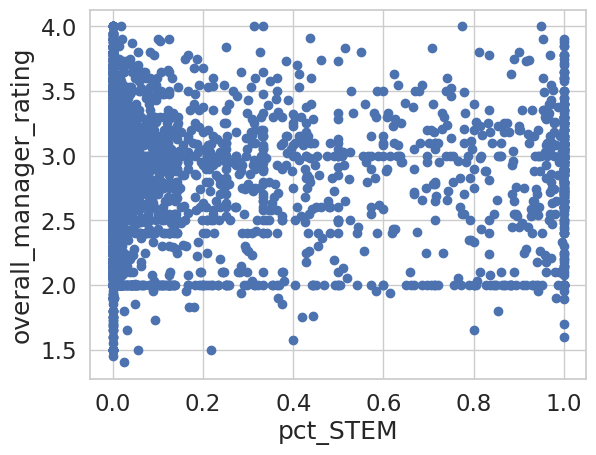

In [ ]:
plt.scatter(df_completo_01_ohe['pct_STEM'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('pct_STEM')
plt.ylabel('overall_manager_rating')
plt.show()

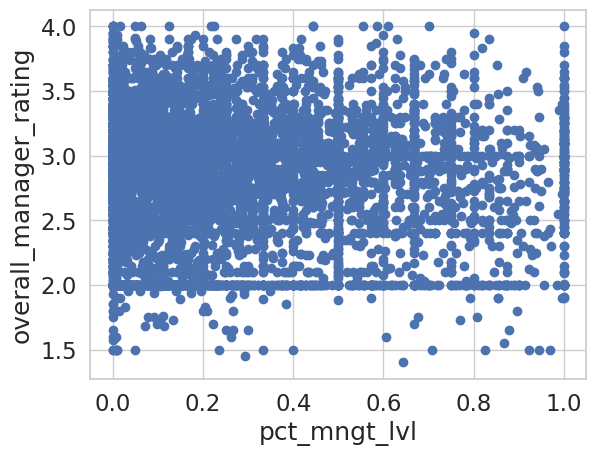

In [ ]:
plt.scatter(df_completo_01_ohe['pct_mngt_lvl'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('pct_mngt_lvl')
plt.ylabel('overall_manager_rating')
plt.show()

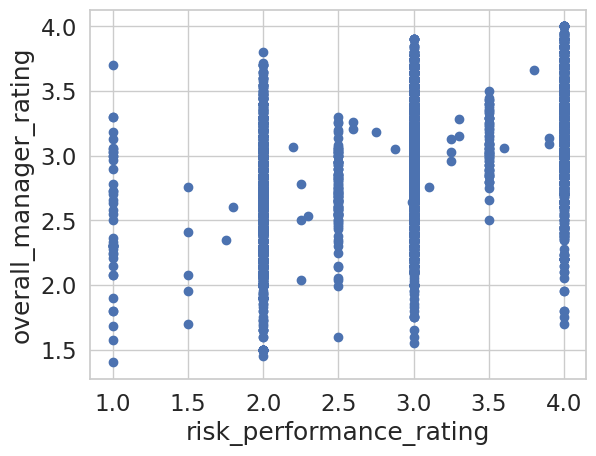

In [ ]:
plt.scatter(df_completo_01_ohe['risk_performance_rating'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('risk_performance_rating')
plt.ylabel('overall_manager_rating')
plt.show()

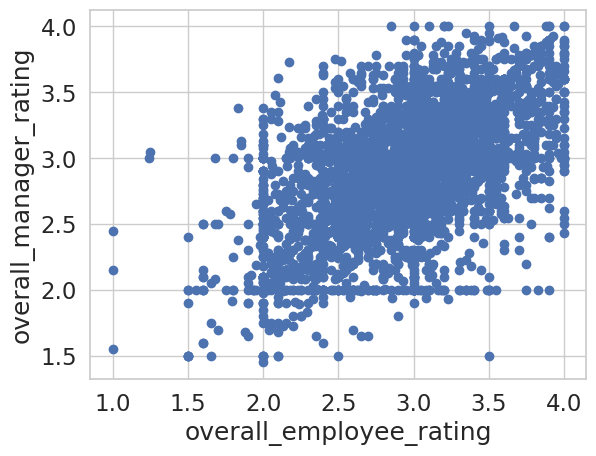

In [ ]:
plt.scatter(df_completo_01_ohe['overall_employee_rating'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('overall_employee_rating')
plt.ylabel('overall_manager_rating')
plt.show()

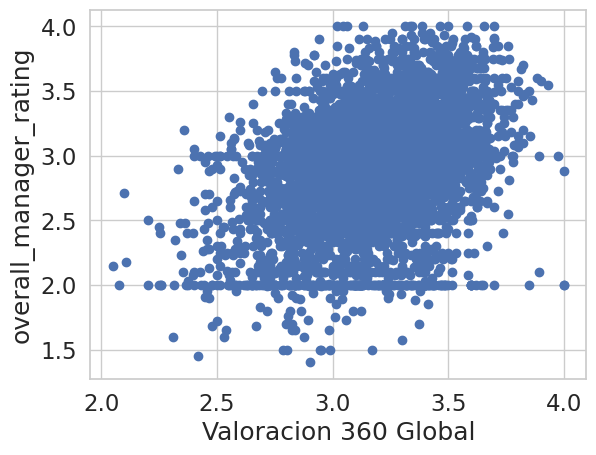

In [ ]:
plt.scatter(df_completo_01_ohe['Valoracion 360 Global'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('Valoracion 360 Global')
plt.ylabel('overall_manager_rating')
plt.show()

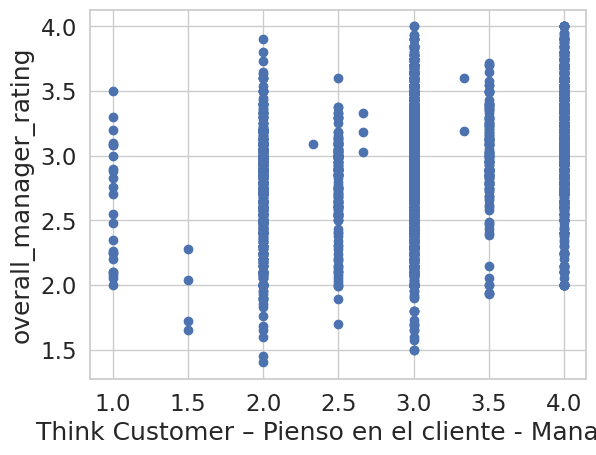

In [ ]:
plt.scatter(df_completo_01_ohe['Think Customer – Pienso en el cliente - Manager'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('Think Customer – Pienso en el cliente - Manager')
plt.ylabel('overall_manager_rating')
plt.show()

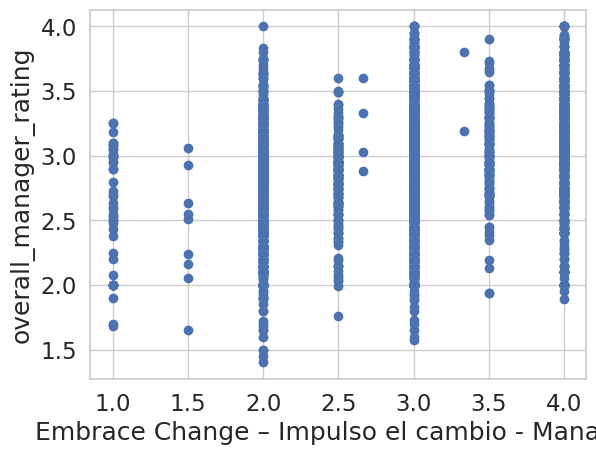

In [ ]:
plt.scatter(df_completo_01_ohe['Embrace Change – Impulso el cambio - Manager'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('Embrace Change – Impulso el cambio - Manager')
plt.ylabel('overall_manager_rating')
plt.show()

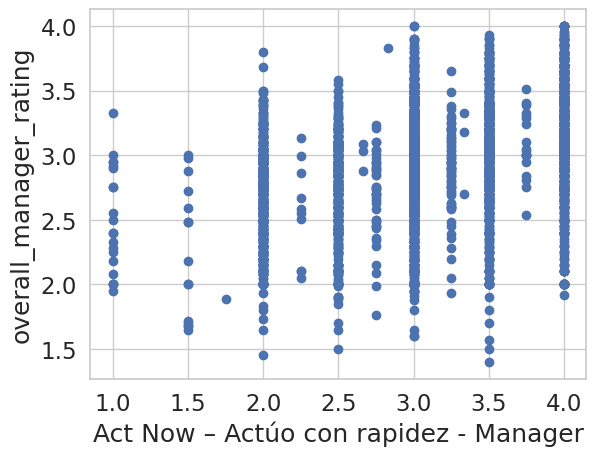

In [ ]:
plt.scatter(df_completo_01_ohe['Act Now – Actúo con rapidez - Manager'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('Act Now – Actúo con rapidez - Manager')
plt.ylabel('overall_manager_rating')
plt.show()

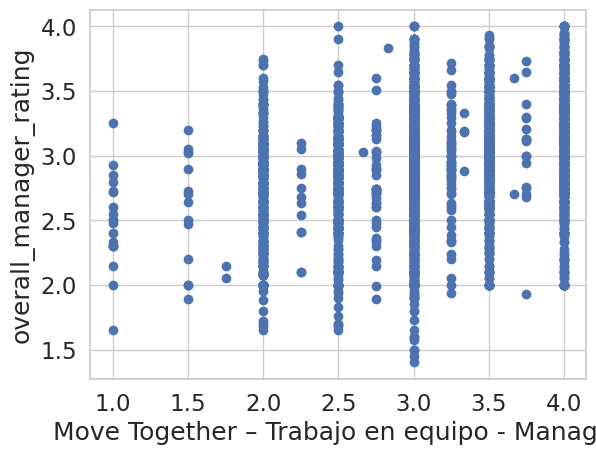

In [ ]:
plt.scatter(df_completo_01_ohe['Move Together – Trabajo en equipo - Manager'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('Move Together – Trabajo en equipo - Manager')
plt.ylabel('overall_manager_rating')
plt.show()

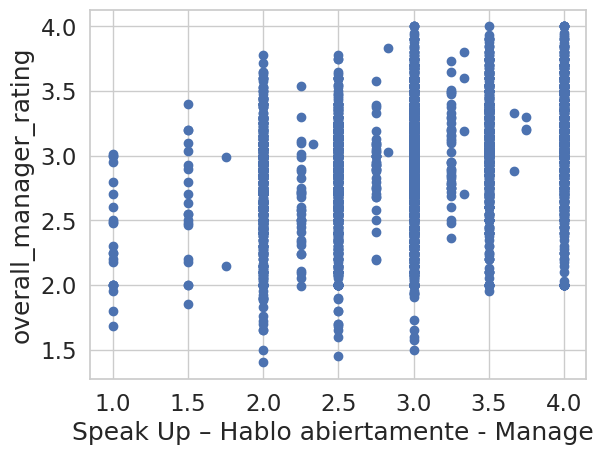

In [ ]:
plt.scatter(df_completo_01_ohe['Speak Up – Hablo abiertamente - Manager'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('Speak Up – Hablo abiertamente - Manager')
plt.ylabel('overall_manager_rating')
plt.show()

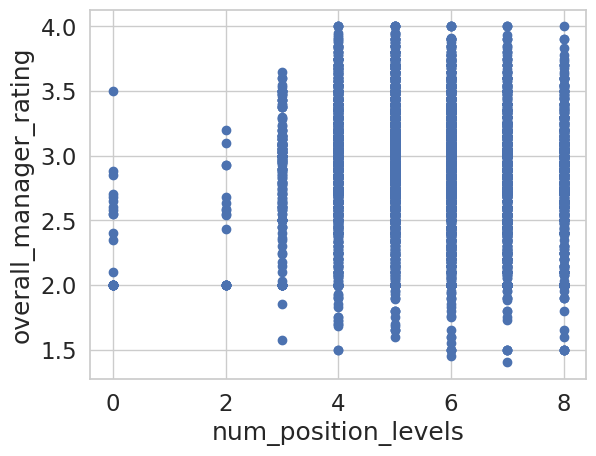

In [ ]:
plt.scatter(df_completo_01_ohe['num_position_levels'],df_completo_01_ohe['overall_manager_rating'])
plt.xlabel('num_position_levels')
plt.ylabel('overall_manager_rating')
plt.show()

In [ ]:
print(df_completo_01_ohe.describe())

               Age   n_children  spain_of_control    pct_women  pct_below40  \
count  6616.000000  6616.000000       6616.000000  6616.000000  6616.000000   
mean     47.986245     1.129837        187.311064     0.412792     0.477897   
std       6.959789     1.276420       1029.641290     0.237555     0.283693   
min       0.000000     0.000000          0.000000     0.000000     0.000000   
25%      44.000000     0.000000          6.000000     0.272727     0.266667   
50%      48.000000     1.000000         18.000000     0.436608     0.500000   
75%      52.000000     2.000000         70.000000     0.571429     0.689306   
max      74.000000     9.000000      28838.000000     1.000000     1.000000   

       pct_above60  avg_age_sub  avg_ten_sub  pct_corp_seg     pct_STEM  ...  \
count  6616.000000  6616.000000  6616.000000   6616.000000  6616.000000  ...   
mean      0.018383    35.804114     9.813207      0.010161     0.105618  ...   
std       0.048602    13.211290     6.138766    

In [ ]:
print(df_completo_01_ohe['Country of Origin'].value_counts())

Spain                       2621
Brazil                       651
Mexico                       289
Argentina                    284
Chile                        259
Portugal                     258
United States of America     122
United Kingdom                89
Italy                         73
Uruguay                       53
France                        48
Colombia                      45
Peru                          40
Netherlands                   24
Germany                       18
Poland                        17
Switzerland                   14
Hong Kong                     12
Venezuela                     12
Angola                         9
Ireland                        7
India                          6
Mozambique                     6
China                          5
Australia                      4
Iraq                           3
Greece                         3
Austria                        3
Romania                        3
Belgium                        3
Equatorial

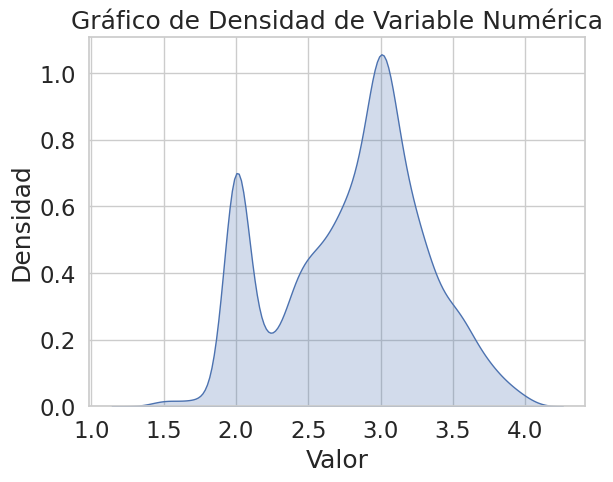

In [ ]:
# Utilizando Seaborn para un gráfico de densidad
sns.kdeplot(df_completo_01_ohe['overall_manager_rating'], fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

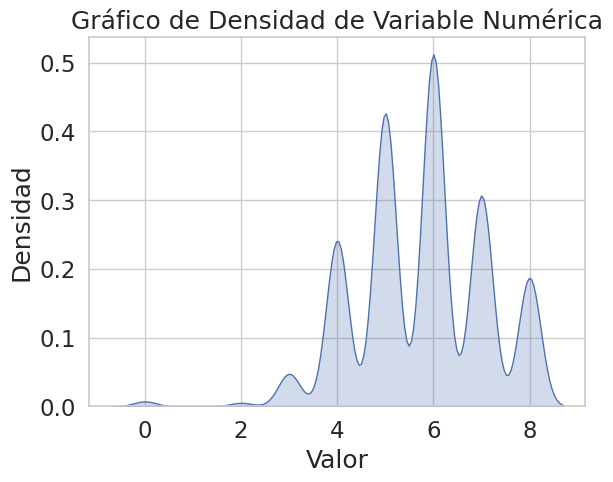

In [ ]:
sns.kdeplot(df_completo_01_ohe['num_position_levels'], fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

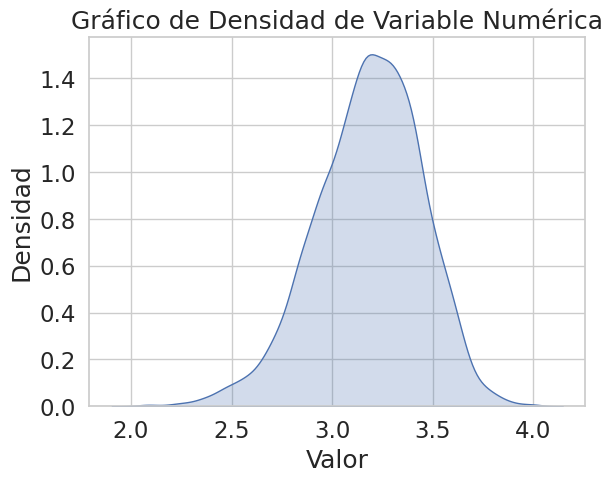

In [ ]:
sns.kdeplot(df_completo_01_ohe['Valoracion 360 Global'], fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-139-9df2c3b070db>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['Age'], shade=True)


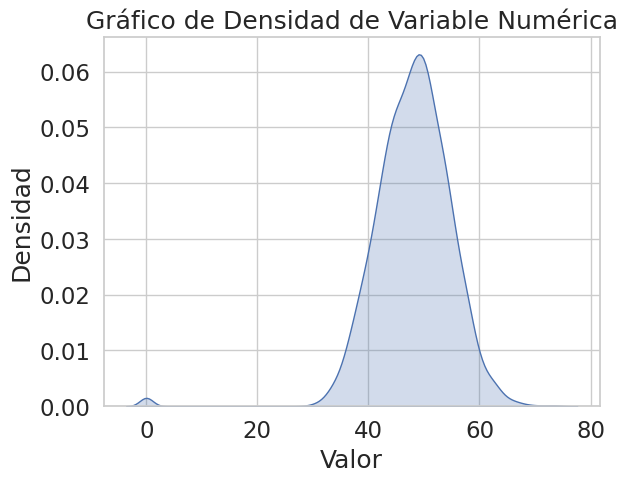

In [ ]:
sns.kdeplot(df_completo_01_ohe['Age'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-140-c794ee6ee358>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['risk_performance_rating'], shade=True)


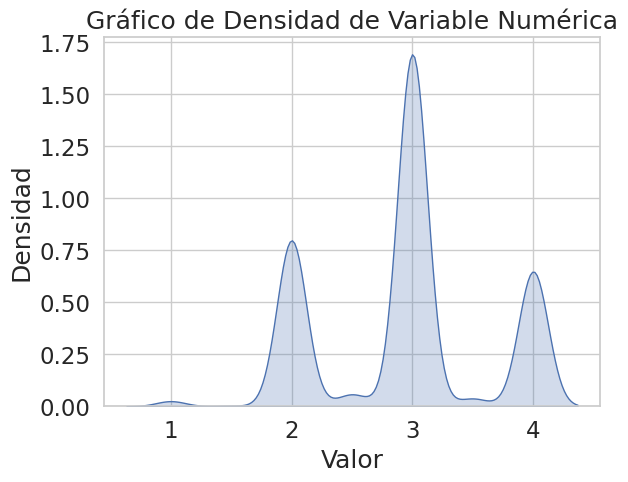

In [ ]:
sns.kdeplot(df_completo_01_ohe['risk_performance_rating'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-141-4586abb45a32>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['overall_employee_rating'], shade=True)


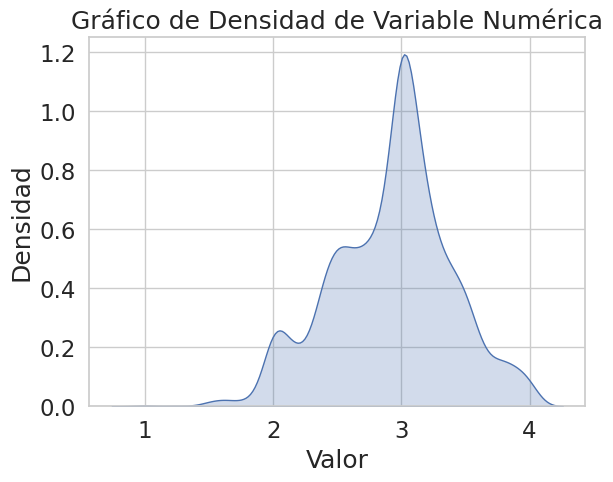

In [ ]:
sns.kdeplot(df_completo_01_ohe['overall_employee_rating'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-142-a8b486516caf>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['Think Customer – Pienso en el cliente - Manager'], shade=True)


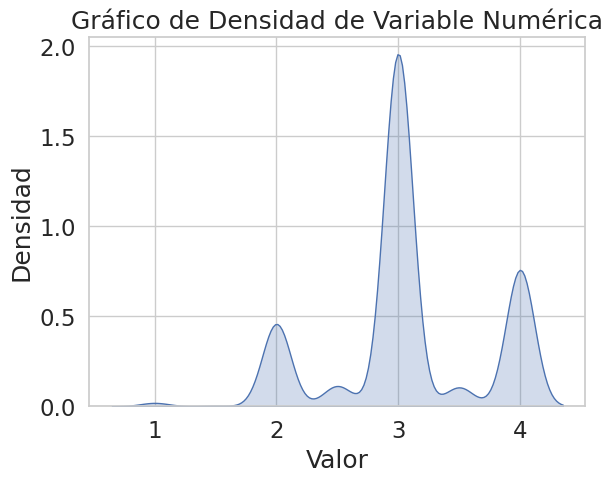

In [ ]:
sns.kdeplot(df_completo_01_ohe['Think Customer – Pienso en el cliente - Manager'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-143-8823619bbe2d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['Embrace Change – Impulso el cambio - Manager'], shade=True)


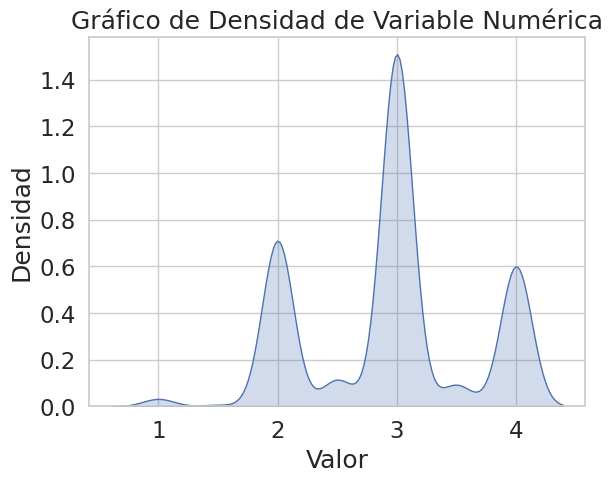

In [ ]:
sns.kdeplot(df_completo_01_ohe['Embrace Change – Impulso el cambio - Manager'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-144-1ae0b61285c6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['Act Now – Actúo con rapidez - Manager'], shade=True)


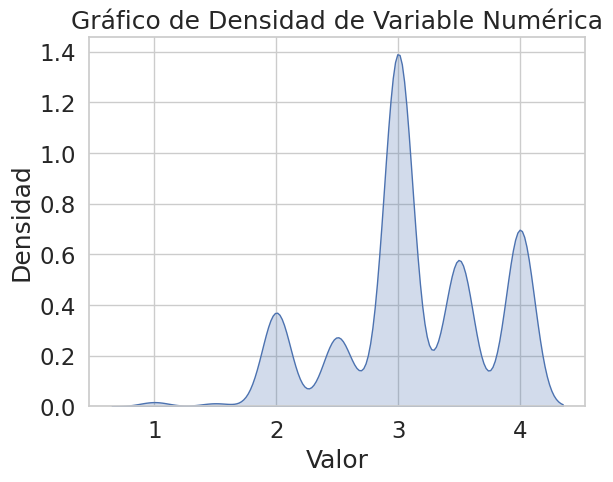

In [ ]:
sns.kdeplot(df_completo_01_ohe['Act Now – Actúo con rapidez - Manager'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-145-6bf7212e4c2f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['Move Together – Trabajo en equipo - Manager'], shade=True)


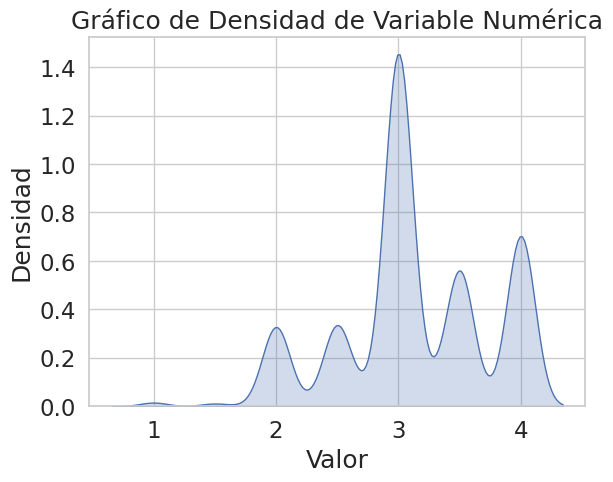

In [ ]:
sns.kdeplot(df_completo_01_ohe['Move Together – Trabajo en equipo - Manager'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

<ipython-input-146-a00b041eca9e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_completo_01_ohe['Speak Up – Hablo abiertamente - Manager'], shade=True)


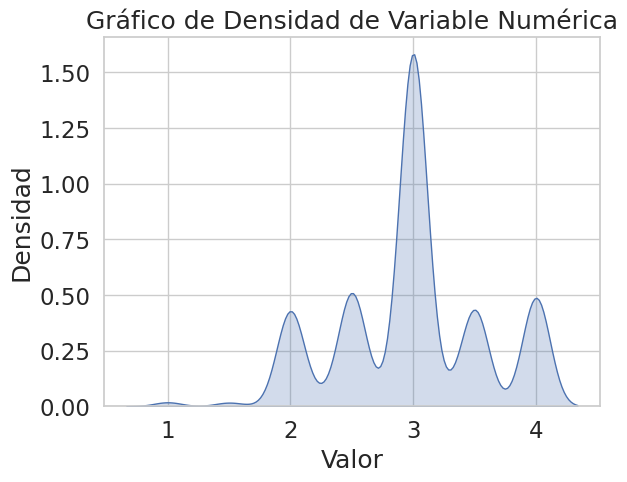

In [ ]:
sns.kdeplot(df_completo_01_ohe['Speak Up – Hablo abiertamente - Manager'], shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Variable Numérica')
plt.show()

#CLUSTERIFICACIÓN:
K means,
DB scan,
K prototypes

In [ ]:
!pip install kmodes
!pip install kneed
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


**Kmeans**

Observamos que en el dataframe en el que se ha aplicado el one hot encoding para transformar las variables categóricas en variables numéricas existen valores NaN, valores que el algoritmo no puede procesar. Por ello, vamos a susituir los valores NaN por 0:  

In [ ]:
df_completo_01_ohe_scaled.fillna(0, inplace=True)

In [ ]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 44,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 15):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(df_completo_01_ohe_scaled)
   ...:     sse.append(kmeans.inertia_)

Cuando se grafica la SSE en función del número de clústeres, se observa que la SSE continúa disminuyendo a medida que aumenta k. A medida que se agregan más centroides, la distancia desde cada punto hasta su centroide más cercano disminuirá.

Hay un punto dulce donde la curva SSE comienza a doblarse conocida como el punto del codo. Se asume que el valor x de este punto es una compensación razonable entre el error y el número de clústeres.

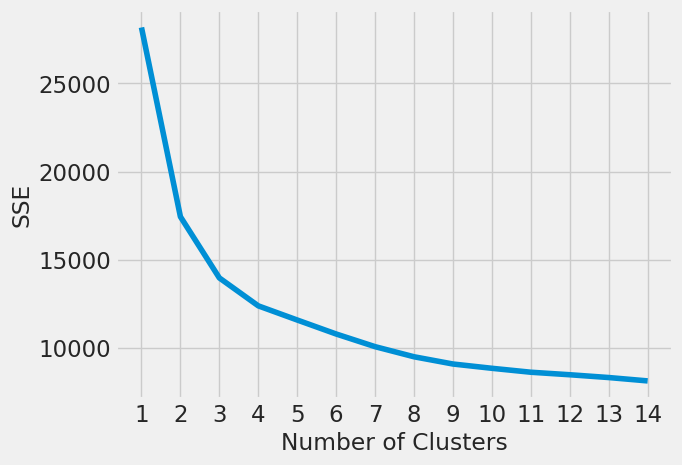

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Podemos usar kneed para identificar el codo mediante programación:

In [ ]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

4

Como podemos observar tanto en la gráfica como con el codigo kneed, el número de cluster óptimo es 4

In [ ]:
kmeans = KMeans(
   ...:     init="random",
   ...:     n_clusters=4,
   ...:     n_init=10,
   ...:     max_iter=300,
   ...:     random_state=44
   ...: )

In [ ]:
kmeans.fit(df_completo_01_ohe_scaled)

KMeans(init='random', n_clusters=4, n_init=10, random_state=44)

In [ ]:
kmeans.inertia_ ##valor de SSE más bajo##


12387.132157170065

In [ ]:
kmeans.cluster_centers_ ##localizaciones finales de los centroides##

array([[7.24858649e-02, 5.48100346e-03, 4.09732145e-01, 4.92043825e-01,
        2.65331629e-02, 4.49949949e-01, 2.87420385e-01, 3.90551961e-03,
        1.10596373e-01, 2.62563682e-01, 1.03838384e-01, 6.55269678e-02,
        3.95972937e-01, 3.91509434e-01, 4.31083696e-01, 3.01986850e-01,
        3.21740042e-01, 3.13302840e-01, 3.12330856e-01, 2.80014182e-02,
        3.06038141e-02, 3.66404035e-02, 3.26636037e-02, 3.22088467e-02,
        2.68312494e-02, 6.27281524e-03, 5.33638269e-03, 5.14579760e-03,
        5.43167524e-03, 5.14579760e-03, 4.85991995e-03, 6.32674447e-03,
        4.95521250e-03, 4.66933486e-03, 3.71640938e-03, 5.33638269e-03,
        4.95521250e-03, 1.27261547e-03, 4.41810905e-04, 6.25357347e-04,
        4.51723329e-04, 4.15415952e-04, 4.30888044e-04, 1.00000000e+00],
       [1.72013017e-01, 5.08670423e-03, 3.97981583e-01, 4.50275843e-01,
        1.43989044e-02, 4.79469922e-01, 3.28995588e-01, 1.45588863e-02,
        1.00563186e-01, 2.84690907e-01, 3.37482566e-01, 1.00760

In [ ]:
kmeans.n_iter_ ##número de iteraciones requeridas para converger##

9

In [ ]:
kmeans.labels_[:10] ##10 primeras etiquetas predichas##

array([2, 0, 2, 2, 3, 2, 2, 0, 3, 2], dtype=int32)

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=43, random_state=43))])

In [ ]:
clusterer = Pipeline([("kmeans",KMeans(init="k-means++",n_init=50,max_iter=500,random_state=43))])

In [ ]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [ ]:
pipe.fit(df_completo_01_ohe_scaled)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=43, random_state=43))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_init=50,
                                         random_state=43))]))])

In [ ]:
cluster_assignments = kmeans.labels_

In [ ]:
df_completo_01_ohe_scaled['cluster'] = cluster_assignments

In [ ]:
cluster_centers = kmeans.cluster_centers_


In [ ]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_completo_01_ohe_scaled.columns)
print(cluster_centers_df)

   n_children  spain_of_control  pct_women  pct_below40  pct_above60  \
0    0.072486          0.005481   0.409732     0.492044     0.026533   
1    0.172013          0.005087   0.397982     0.450276     0.014399   
2    0.138431          0.009661   0.454740     0.517080     0.024193   
3    0.136759          0.002187   0.338073     0.394739     0.017973   

   avg_age_sub  avg_ten_sub  pct_corp_seg  pct_STEM  pct_mngt_lvl  ...  \
0     0.449950     0.287420      0.003906  0.110596      0.262564  ...   
1     0.479470     0.328996      0.014559  0.100563      0.284691  ...   
2     0.517939     0.334480      0.013067  0.120798      0.274482  ...   
3     0.379277     0.238678      0.009330  0.069753      0.233252  ...   

   Act Now – Actúo con rapidez - Manager  \
0                               0.003716   
1                               0.701679   
2                               0.658454   
3                               0.545938   

   Move Together – Trabajo en equipo - Manager 

In [ ]:
cluster_sizes = cluster_centers_df['cluster'].value_counts()
print(cluster_sizes)

1.000000e+00    1
2.000000e+00    1
3.000000e+00    1
3.108624e-15    1
Name: cluster, dtype: int64


In [ ]:
cluster_stats = df_completo_01_ohe_scaled.groupby('cluster').mean()
print(cluster_stats)

         n_children  spain_of_control  pct_women  pct_below40  pct_above60  \
cluster                                                                      
0          0.072486          0.005481   0.409732     0.492044     0.026533   
1          0.172013          0.005087   0.397982     0.450276     0.014399   
2          0.138431          0.009661   0.454740     0.517080     0.024193   
3          0.136759          0.002187   0.338073     0.394739     0.017973   

         avg_age_sub  avg_ten_sub  pct_corp_seg  pct_STEM  pct_mngt_lvl  ...  \
cluster                                                                  ...   
0           0.449950     0.287420      0.003906  0.110596      0.262564  ...   
1           0.479470     0.328996      0.014559  0.100563      0.284691  ...   
2           0.517939     0.334480      0.013067  0.120798      0.274482  ...   
3           0.379277     0.238678      0.009330  0.069753      0.233252  ...   

         Embrace Change – Impulso el cambio - Mana

Evaluamos el rendimiento calculando el coeficiente de silueta (silhouete). Un coeficiente de silueta de 0 indica que los grupos se superponen significativamente entre sí,
y un coeficiente de silueta de 1 indica que los grupos están bien separados.

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(df_completo_01_ohe_scaled)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.2280300969905133

El coeficiente de silhouete nos indica que existe superposición entre los 4 clúster identificados en el Kmeans.

**DBScan (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_completo_01_ohe_scaled)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=7)
clusters = dbscan.fit_predict(df_completo_01_ohe_scaled)
df_completo_01_ohe_scaled['cluster'] = clusters

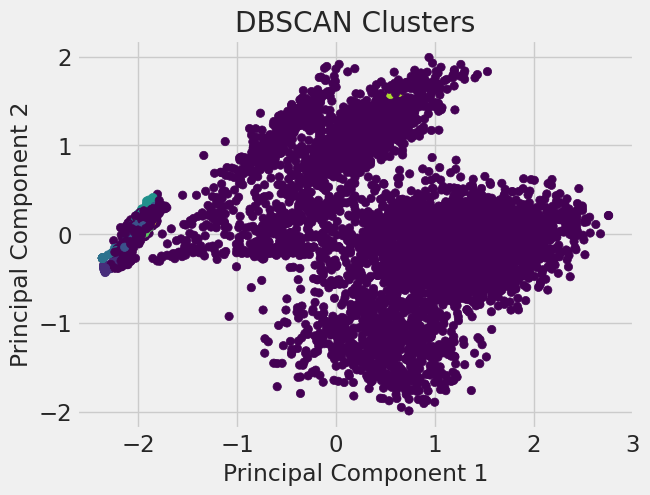

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=43)
pca_result = pca.fit_transform(df_completo_01_ohe_scaled.drop('cluster', axis=1))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
epsilon = 0.5 # The radius within which to search for nearby points
min_samples = 7  # The minimum number of points required to form a dense region
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(df_scaled)

In [ ]:
unique_clusters = set(cluster_labels)
num_clusters = len(unique_clusters)
num_noise_points = sum(1 for label in cluster_labels if label == -1)

In [ ]:
cluster_statistics = []
for cluster in unique_clusters:
    num_points_in_cluster = (cluster_labels == cluster).sum()
    cluster_statistics.append({
        'Cluster': cluster,
        'Number of Points': num_points_in_cluster,
    })

In [ ]:
cluster_stats_df = pd.DataFrame(cluster_statistics)

print("Number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)
print("\nCluster statistics:")
print(cluster_stats_df)

Number of clusters: 9
Number of noise points: 6476

Cluster statistics:
   Cluster  Number of Points
0        0                13
1        1                68
2        2                 9
3        3                 7
4        4                14
5        5                12
6        6                10
7        7                 7
8       -1              6476


Observamos que tenemos 6476 puntos de ruido en nuestro análisis de DB SCan, valor que no varía significativamente al aplicar diferentes valores a epsilon y a min_samples (siempre están por encima de 6000), estos puntos de ruido son valores que no cumplen los requisitos que hemos marcado, es decir, están fuera de cualquier clúster identificado. Esto nos lleva a interpretar que nuestros datos no están formando clústeres.

**K prototypes**

Identificamos las columnas con valores categóricas

In [ ]:
categorical_columns = df_completo_01_ohe_scaled.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index([], dtype='object')

No se identifican variables categóricas, por lo que no se puede aplicar el algoritmo de K prototypes

# **Cálculo de regresión**




**Análisis de regresión lineal multivariante**

Dado que nuestros datos no se adaptan a agrupaciones por clúster, vamos a calcular la regresión de los mismos. Empezaremos con un análisis multivariante de regresión lineal

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
##Definimos la variable dependiente como la valoración global y las variables independientes como el resto de variables que aparecen en nuestro data frame##

In [ ]:
print(nombres_columnas)

NameError: ignored

In [ ]:
X = df_completo_01_ohe_scaled[['n_children', 'spain_of_control', 'pct_women', 'pct_below40',
       'pct_above60', 'avg_age_sub', 'avg_ten_sub', 'pct_corp_seg', 'pct_STEM',
       'pct_mngt_lvl', 'what_performance_rating_h',
       'what_performance_rating_f', 'how_performance_rating',
       'risk_performance_rating', 'overall_manager_rating',
       'emp_what_perf_rating', 'emp_how_perf_rating', 'emp_rsk_perf_rating',
       'overall_employee_rating',
       'Think Customer – Pienso en el cliente - Global',
       'Embrace Change – Impulso el cambio - Global',
       'Act Now – Actúo con rapidez - Global',
       'Move Together – Trabajo en equipo - Global',
       'Speak Up – Hablo abiertamente - Global',
       'Valoracion 360 Autovaloracion',
       'Think Customer – Pienso en el cliente - Autovaloracion',
       'Embrace Change – Impulso el cambio - Autovaloracion',
       'Act Now – Actúo con rapidez - Autovaloracion',
       'Move Together – Trabajo en equipo - Autovaloracion',
       'Speak Up – Hablo abiertamente - Autovaloracion',
       'Valoracion 360 Manager',
       'Think Customer – Pienso en el cliente - Manager',
       'Embrace Change – Impulso el cambio - Manager',
       'Act Now – Actúo con rapidez - Manager',
       'Move Together – Trabajo en equipo - Manager',
       'Speak Up – Hablo abiertamente - Manager',
       'Valoracion 360 Colaboradores',
       'Think Customer – Pienso en el cliente - Colaboradores',
       'Embrace Change – Impulso el cambio - Colaboradores',
       'Act Now – Actúo con rapidez - Colaboradores',
       'Move Together – Trabajo en equipo - Colaboradores',
       'Speak Up – Hablo abiertamente - Colaboradores']]
y = df_completo_01_ohe_scaled['Valoracion 360 Global']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [ ]:
modelo = sm.OLS(y, X).fit()

In [ ]:
print(modelo.summary())


                              OLS Regression Results                             
Dep. Variable:     Valoracion 360 Global   R-squared:                       0.994
Model:                               OLS   Adj. R-squared:                  0.994
Method:                    Least Squares   F-statistic:                 2.807e+04
Date:                   Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                           22:46:49   Log-Likelihood:                 16302.
No. Observations:                   6616   AIC:                        -3.252e+04
Df Residuals:                       6573   BIC:                        -3.223e+04
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0004067883624848288
R-squared: 0.9945146317286969


In [ ]:
##Analizamos los valores estadísticos obtenidos en nuestro análisis de regresión:##

MSE: El valor obtenido de MSE (Mean Squared Error) de 0.0003909335480122403 nos indica que el modelo evaluado evaluando tiene un bajo nivel de error cuadrático medio en la predicción de los valores observados en los datos. El MSE es una medida de la calidad de ajuste de un modelo de regresión, y se utiliza para evaluar como se ajustan las predicciones del modelo con los valores reales.

En este caso, un valor de MSE tan bajo indica que las predicciones del modelo están muy cerca de los valores reales. Cuanto más cercano a cero sea el valor de MSE, mejor será el ajuste del modelo a los datos.

Un MSE de 0.0003909335480122403 sugiere que el modelo de regresión es bastante preciso en la predicción de los valores del conjunto de datos.

 Durbin-Watson: es una prueba utilizada en análisis de regresión para evaluar la autocorrelación de los residuos, es decir, si hay patrones sistemáticos en los errores de predicción que podrían violar uno de los supuestos fundamentales de la regresión lineal múltiple: la independencia de los errores.

El valor del estadístico Durbin-Watson puede variar entre 0 y 4. Un valor de 2 indica que no hay autocorrelación serial en los residuos, lo que es deseable en un análisis de regresión. Valores cercanos a 0 sugieren autocorrelación positiva (los residuos tienden a estar correlacionados positivamente entre sí), mientras que valores cercanos a 4 sugieren autocorrelación negativa (los residuos tienden a estar correlacionados negativamente entre sí).

Un valor de Durbin-Watson de 1.882 se encuentra cerca de 2, lo que sugiere que hay muy poca evidencia de autocorrelación serial en los residuos del análisis de regresión multivariante. Esto es una buena noticia, ya que indica que los residuos se comportan de manera independiente, lo que es importante para la validez de las inferencias y predicciones realizadas a partir del modelo de regresión.

Kurtosis: una medida estadística que describe la forma de la distribución de datos en un conjunto de datos. Más específicamente, la kurtosis se relaciona con la concentración de datos en la cola de la distribución en comparación con la distribución normal (conocida como la distribución de campana o forma de campana). Una kurtosis positiva indica que la distribución tiene colas más pesadas (más valores extremos) en comparación con la distribución normal, mientras que una kurtosis negativa indica colas más ligeras (menos valores extremos) que la distribución normal.

En el contexto de un análisis multivariante de regresión, una kurtosis de 9.895 sugiere que la distribución de los errores (residuos) del modelo de regresión tiene colas muy pesadas, lo que significa que hay valores extremos o atípicos en los datos de residuos que están alejados de la media en comparación con lo que se esperaría bajo una distribución normal. Estos valores extremos pueden indicar que el modelo de regresión no se ajusta bien a los datos en algunas áreas o que hay otros factores no tenidos en cuenta que afectan a la distribución de los residuos.

En resumen, una kurtosis alta en un análisis multivariante de regresión puede indicar problemas con la suposición de normalidad de los residuos, lo que puede afectar la validez de las pruebas estadísticas y las inferencias realizadas sobre el modelo de regresión. Sería importante investigar más a fondo los datos y considerar si es necesario tomar medidas para abordar los valores atípicos o ajustar el modelo de regresión.

Skew: asimetría en la distribución de los datos en un análisis estadístico. Un valor de skew de -1.047 indica que la distribución de los datos está sesgada hacia la izquierda (o hacia la cola izquierda) de la distribución. Esto significa que la mayoría de los valores se encuentran en el extremo derecho de la distribución, y hay una cola larga en el lado izquierdo con valores más bajos.

En el contexto de un análisis multivariante de regresión, este valor de skew podría referirse a la asimetría en la distribución de los residuos del modelo de regresión. Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo de regresión. Un skew negativo en los residuos indica que los residuos tienden a ser más pequeños y negativos, lo que significa que el modelo tiende a sobreestimar los valores observados en lugar de subestimarlos.

Prueba de Goldfeld-Quandt: La prueba de Goldfeld-Quandt es una prueba estadística utilizada para verificar la heterocedasticidad en un modelo de regresión. Se aplica comúnmente en modelos de regresión lineal simple, pero no es tan común en análisis multivariados de regresión. Sin embargo, puedes realizar una versión adaptada de la prueba de Goldfeld-Quandt en un análisis multivariante de regresión si tienes razones para sospechar que la heterocedasticidad es un problema en tu modelo.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt
test_statistic, p_value, _ = het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(f"Estadístico de prueba de Goldfeld-Quandt: {test_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Hay evidencia de heterocedasticidad.")
else:
    print("No hay evidencia suficiente para concluir que existe heterocedasticidad.")


Estadístico de prueba de Goldfeld-Quandt: 1.2201838596946082
Valor p: 6.719900847346831e-09
Hay evidencia de heterocedasticidad.


Prueba de White: una prueba estadística utilizada para evaluar la heterocedasticidad en un modelo de regresión.

In [ ]:
df_completo_01_ohe_scaled = sm.add_constant(df_completo_01_ohe_scaled)
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
white_test = sm.stats.diagnostic.het_white(results.resid, exog=results.model.exog)

# Imprimimos el resultado de la prueba.
print("Estadística de la prueba de White:", white_test[0])
print("P-valor de la prueba de White:", white_test[1])
print("Valor crítico 1 de la prueba de White:", white_test[2])
print("Valor crítico 2 de la prueba de White:", white_test[3])


Estadística de la prueba de White: 4491.807593476847
P-valor de la prueba de White: 0.0
Valor crítico 1 de la prueba de White: 12.687572687906284
Valor crítico 2 de la prueba de White: 0.0


1. **Estadística de la prueba de White (White Test Statistic)**: La estadística de la prueba es 4559.729732156484. Cuanto mayor sea este valor, mayor será la evidencia en contra de la hipótesis nula de que no hay heteroscedasticidad en el modelo.

2. **P-valor de la prueba de White (White Test P-Value)**: El p-valor es la probabilidad de obtener una estadística de prueba igual o más extrema que la observada si la hipótesis nula (en este caso, la ausencia de heteroscedasticidad) fuera verdadera. Un p-valor bajo, en este caso 0.0, generalmente sugiere que hay evidencia significativa en contra de la hipótesis nula. En otras palabras, en base a este p-valor, podríamos rechazar la hipótesis nula y concluir que existe heteroscedasticidad en el modelo.

3. **Valor crítico 1 de la prueba de White**: Este valor crítico se utiliza para comparar con la estadística de la prueba. Si la estadística de la prueba es mayor que este valor crítico, se considera evidencia en contra de la hipótesis nula. En este caso, el valor crítico 1 es 12.842691445332745.

4. **Valor crítico 2 de la prueba de White**: Este es otro valor crítico que se utiliza para la comparación. Si la estadística de la prueba es mayor que este valor crítico, también se considera evidencia en contra de la hipótesis nula. En este caso, el valor crítico 2 es 0.0.

Dado que la estadística de la prueba es mucho mayor que ambos valores críticos y el p-valor es extremadamente bajo (cercano a cero), esto sugiere fuertemente que hay evidencia de heteroscedasticidad en el modelo, lo que significa que la varianza de los errores no es constante a lo largo de los datos y que el modelo de regresión lineal podría no ser apropiado sin correcciones.

**Análisis de regresión polinómica multivariante**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")



Error cuadrático medio (MSE): 0.0005375913363841238
Coeficiente de determinación (R^2): 0.9927508091885522


Grado 2:
El MSE es aproximadamente 0.0005376, lo que indica que las predicciones del modelo están muy cerca de los valores reales.
El valor de R^2 es aproximadamente 0.9928, lo que sugiere que el modelo de regresión polinómica multivariante explica aproximadamente el 99.28% de la variabilidad en los datos, lo cual es muy alto y sugiere un ajuste muy bueno del modelo.
Los resultados obtenidos indican que el modelo de regresión polinómica multivariante tiene un ajuste muy bueno a los datos, con un bajo Error Cuadrático Medio (MSE) y un alto Coeficiente de Determinación (R^2). Esto sugiere que el modelo es capaz de hacer predicciones precisas y que la mayoría de la variabilidad en los datos se explica mediante el modelo.


In [ ]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 9.866034777347315e-05
Coeficiente de determinación (R^2): 0.998669607119519


Grado 3: tiene un bajo error cuadrático medio y explica una gran parte de la variabilidad en la variable dependiente, lo que sugiere que es un modelo sólido y que se ajusta bien a los datos.

**Random forest de regresión**

In [ ]:
df_completo_01_ohe_scaled. info


<bound method DataFrame.info of       const  n_children  spain_of_control  pct_women  pct_below40  \
0       1.0    0.333333          0.004751   0.379562     0.766423   
1       1.0    1.000000          0.002254   0.507692     0.892308   
2       1.0    0.333333          0.002982   0.360465     0.511628   
3       1.0    0.111111          0.002843   0.500000     0.487805   
4       1.0    0.444444          0.001768   0.627451     0.411765   
...     ...         ...               ...        ...          ...   
6611    1.0    0.000000          0.001560   0.444444     0.266667   
6612    1.0    0.000000          0.000000   0.000000     0.000000   
6613    1.0    0.000000          0.105694   0.508202     0.622703   
6614    1.0    0.000000          0.072404   0.290709     0.632663   
6615    1.0    0.000000          0.005514   0.238994     0.352201   

      pct_above60  avg_age_sub  avg_ten_sub  pct_corp_seg  pct_STEM  ...  \
0        0.026483     0.480265     0.203496      0.000000  0.02

In [ ]:
##Dividimos nuestro dataset en dos dataset: el primero tendrá un 90% de los datos y es el que usaremos para realizar el random forest y el segundo tendrá el 10% de los datos y lo##
##utilizaremos como datos de validación##


In [ ]:
total_filas = len(df_completo_01_ohe_scaled)
filas_10porciento = int(6616 * 0.10)
filas_90porciento = total_filas - filas_10porciento
df_10porciento = df_completo_01_ohe_scaled.sample(n=filas_10porciento, random_state=42)
df_90porciento = df_completo_01_ohe_scaled.drop(df_10porciento.index)

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Supongamos que tu objetivo es predecir la columna 'target' (tu variable de respuesta)
# y que las características se encuentran en las columnas restantes de tu DataFrame.

# Divide tus datos en conjuntos de entrenamiento y prueba
X = df_90porciento.drop('Valoracion 360 Global', axis=1)
y = df_90porciento['Valoracion 360 Global']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de Random Forest de regresión
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el modelo en los datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Evalúa el rendimiento del modelo (por ejemplo, usando el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f'R-squared (R^2): {r2}')

# También puedes analizar la importancia de las características si lo deseas
feature_importances = rf_regressor.feature_importances_
print("Importancia de las características:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Error Cuadrático Medio (MSE): 0.000213731277478281
R-squared (R^2): 0.998669607119519
Importancia de las características:
const: 0.0
n_children: 5.343984914636156e-05
spain_of_control: 0.0001316824689566249
pct_women: 0.00014751742445577435
pct_below40: 0.00015842436111668186
pct_above60: 6.362676324218124e-05
avg_age_sub: 0.00012741900797994855
avg_ten_sub: 0.00013795305986863654
pct_corp_seg: 4.3132054588675675e-05
pct_STEM: 5.3702757612537784e-05
pct_mngt_lvl: 0.00016781870416470465
what_performance_rating_h: 0.0001057053664077725
what_performance_rating_f: 3.451567444681272e-05
how_performance_rating: 0.0002985351184381239
risk_performance_rating: 4.7827513433900276e-05
overall_manager_rating: 0.0001762400187395884
emp_what_perf_rating: 9.383398045871424e-05
emp_how_perf_rating: 5.062824477892244e-05
emp_rsk_perf_rating: 5.860583765642859e-05
overall_employee_rating: 9.984010084500226e-05
Think Customer – Pienso en el cliente - Global: 0.38999605578756075
Embrace Change – Impulso e

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9972631362780419


In [ ]:
from sklearn.model_selection import cross_val_score

X = df_90porciento.drop('Valoracion 360 Global', axis=1)
y = df_90porciento['Valoracion 360 Global']

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

#Utilizamos una cv de 5#
scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Los resultados de cross_val_score son negativos, así que los convertiremos en positivos#
rmse_scores = np.sqrt(-scores)

# Calculamos el promedio y la desviación estándar del RMSE#
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print(f'RMSE promedio: {mean_rmse}')
print(f'Desviación estándar del RMSE: {std_rmse}')


RMSE promedio: 0.024894163940459298
Desviación estándar del RMSE: 0.013890203035906058


In [ ]:
#Visualización de residuales#
fig=plt.figure (figure=(10,5))
residuals=(y_test-y_pred)
sns.distplot (residuals)

RuntimeError: ignored

Serializamos ahora nuestro modelo para posteriomente poder productivizarlo. Para ello utilizaremos joblib:

In [ ]:
import pickle
import joblib

In [ ]:
# Save the model to a file
model_filename = "modelo_rfregression.grupoSantander.pkl"
joblib.dump(rf_regressor, model_filename)


['modelo_rfregression.grupoSantander.pkl']

In [ ]:
from google.colab import files
files.download(model_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**PRODUCTIVIZACIÓN DEL MODELO**
Inferimos que el modelo va a ser utilizado de forma manual, por lo que la herramienta elegida es Streamlit.


In [ ]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/d0/94/11b7b1b059f6ec1fc8660f1eb91a2761008073daaa7a735209e27af09ae3/streamlit-1.27.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for validators<1,>=0.2 from https://files.pythonhosted.org/packages/3a/0c/785d317eea99c3739821718f118c70537639aa43f96bfa1d83a71f68eaf6/validators-0.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/f9/94/1877b88fa3a0a30bedb43757a14f548c3b2719c8d83c16012f89564c0f3b/GitPython-3.1.36-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Obtaining dependency information for smmap<6,>=3.0.1 from https://files.pythonhosted.org/packages/a7/a5/10f97f735

In [ ]:
import streamlit as st
import joblib

In [ ]:
model = RandomForestRegressor(n_estimators=50)
model.fit(df_10porciento, df_10porciento)

RandomForestRegressor(n_estimators=50)

In [ ]:
##Importamos nuestro modelo##
model = joblib.load('modelo_rfregression.grupoSantander.pkl')

In [ ]:
# Set the title and subtitle
st.title("Forecast of candidates for GSH")
st.subheader("Select the value in the different options to obtain an assessment of the candidate")

# Create input fields for each feature
feature1 = st.slider("Think Customer - Pienso en el cliente - Global", 1.00, 4.00, 2.00, 3.00)
feature2 = st.slider("Embrace Change - Impulso el cambio - Global", 1.00, 4.00, 2.00, 3.00)
feature3 = st.slider("Act Now - Actúo con rapidez - Global", 1.00, 4.00, 2.00, 3.00)
feature4 = st.slider("Move together - Trabajo en equipo - Global", 1.00, 4.00, 2.00, 3.00)
feature5 = st.slider("Speak up - Hablo abiertamente - Global", 1.00, 4.00, 2.00, 3.00)
feature6 = st.slider("Spain of Control", 0, 30000, (0, 30000))

# Create a button to perform the prediction
if st.button("Predict"):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        "Think Customer": [feature1],
        "Embrace Change": [feature2],
        "Act Now": [feature3],
        "Move together": [feature4],
        "Speak up": [feature5],
        "Spain of Control": [feature6]
    })

    # Make the prediction using the loaded model
    prediction = model.predict(input_data)[0]

    # Display the prediction
    st.write(f"Valoracion 360 Global: {prediction:.2f}")
